<a href="https://colab.research.google.com/github/bhatnira/Acetylcholinesterase-Inhibitor-Discovery/blob/main/deepNet_Pubchem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PubChem Feature Based DeepNet Classification Modeling

## Introduction

PubChem Substructure Fingerprint is a binary substructure(molecular fragments) fingerprint(ordered list of binary bits) originally developed for PubChem’s similarity neighboring and similarity searching.
PubChem Substructure Fingerprint. Fingerprints of 881 bits were generated(PubChem Substructure Fingerprint, 2009).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data loading and Preprocessing



### Data loading

Acquisition of the primary molecular dataset of the human acetylcholinesterase inhibitor was done from ChEMBL(ID:ChEMBL22). From 18,204 inhibitor entries, 4077 compounds with reported IC50 value and validated SMILE annotations were chosen, with redundant chemical structures resolved by randomly selecting one from the most frequently occurring activity label group. The resulting dataset comprises 2,330 instances labeled as positive and 1,747 instances labeled as negative. Molecules with an IC50 value less than 1uM were labeled as positives, and greater than 1 uM were labeled as negatives.

In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/Part_2_standarizationOfMolecule/StandarizedSmiles_cutOFF800daltonMolecularweight.xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


In [ ]:
df.shape

(4077, 15)

In [ ]:
df2 = pd.concat( [df['cleanedMol'],df['Molecule ChEMBL ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,cleanedMol,Molecule ChEMBL ID
0,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,CHEMBL94
1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,CHEMBL207777
2,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,CHEMBL205967
3,Cc1ccc2c(N)c3c(nc2c1)CCCC3,CHEMBL60119
4,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,CHEMBL294525
...,...,...
4072,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)...,CHEMBL4077157
4073,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2,CHEMBL3906317
4074,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12,CHEMBL4800328
4075,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1,CHEMBL4797670


### Descriptor generation and feature preparation
The method for descriptor generation is adopted from (https://colab.research.google.com/drive/1Kunjr8hF3MQPPN_AGedBP07AOE5Bcu1M?usp=sharing#scrollTo=1msUAjuKiIGP)

In [ ]:
!pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 26.2 MB/s eta 0:00:00


In [ ]:
!wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
!unzip fingerprints_xml.zip

--2024-05-24 22:55:03--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2024-05-24 22:55:03--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2024-05-24 22:55:03 (96.6 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xm

In [ ]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [ ]:
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
fp['PubChem']

'PubchemFingerprinter.xml'

In [ ]:

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL94,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL207777,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL205967,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL60119,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL294525,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4073,CHEMBL3906317,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4074,CHEMBL4800328,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4075,CHEMBL4797670,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature1=features=descriptors.iloc[:, 1:]

In [ ]:
feature1.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target=df["classLabel"]
target.value_counts()

classLabel
0    2330
1    1747
Name: count, dtype: int64

## Classification modeling with deepnet architectures: ANN, CNN, LSTM, GRU, BiLSTM

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, GRU, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    cohen_kappa_score,
    matthews_corrcoef,
    roc_auc_score,
)

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature1)

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

# Reshape input data for LSTM and Bi-LSTM models
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid_lstm = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the number of classes
num_classes = 2

# Define deep learning models
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

lstm_model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

gru_model = Sequential([
    GRU(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

bi_lstm_model = Sequential([
    Bidirectional(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the models
for model in [ann_model, cnn_model, lstm_model, gru_model, bi_lstm_model]:
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train, evaluate, and store results
results = {'Model': [], 'Validation Accuracy': [], 'Test Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],
           'ROC-AUC': [], 'Cohen\'s Kappa': [], 'MCC': []}
for model_name, model in [('ANN', ann_model), ('CNN', cnn_model), ('LSTM', lstm_model), ('GRU', gru_model), ('Bi-LSTM', bi_lstm_model)]:
    # Define early stopping callback based on recall
    early_stopping = EarlyStopping(monitor='val_recall', mode='max', patience=5, restore_best_weights=True)

    # Train the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_valid_lstm, y_valid),
                            callbacks=[early_stopping])
    else:
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping])

    # Evaluate the model
    if model_name in ['LSTM', 'GRU', 'Bi-LSTM']:
        y_valid_pred_prob = model.predict(X_valid_lstm)
        y_test_pred_prob = model.predict(X_test_lstm)
    else:
        y_valid_pred_prob = model.predict(X_valid)
        y_test_pred_prob = model.predict(X_test)

    y_valid_pred = np.argmax(y_valid_pred_prob, axis=1)
    y_test_pred = np.argmax(y_test_pred_prob, axis=1)

    # Calculate evaluation metrics
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_test_pred)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    # Calculate the confusion matrix
    confusion = confusion_matrix(y_test, y_test_pred)

    # Print the confusion matrix as text
    print_confusion_matrix(confusion, model_name)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Validation Accuracy:", valid_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Cohen's Kappa Score:", cohen_kappa)
    print("MCC Score:", mcc)
    print()

    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(valid_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)


Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.8976 - accuracy: 0.5387

90/90 [==============================] - 4s 6ms/step - loss: 0.8976 - accuracy: 0.5387 - val_loss: 0.6298 - val_accuracy: 0.6585
Epoch 2/100
82/90 [==========================>...] - ETA: 0s - loss: 0.6938 - accuracy: 0.6082

90/90 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.6050 - val_loss: 0.6132 - val_accuracy: 0.6797
Epoch 3/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6553 - accuracy: 0.6389

90/90 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6372 - val_loss: 0.5840 - val_accuracy: 0.7059
Epoch 4/100
78/90 [=========================>....] - ETA: 0s - loss: 0.5780 - accuracy: 0.6975

90/90 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.6926 - val_loss: 0.5567 - val_accuracy: 0.7239
Epoch 5/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5548 - accuracy: 0.7169

90/90 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.7150 - val_loss: 0.5384 - val_accuracy: 0.7320
Epoch 6/100
82/90 [==========================>...] - ETA: 0s - loss: 0.5250 - accuracy: 0.7374

90/90 [==============================] - 0s 4ms/step - loss: 0.5250 - accuracy: 0.7364 - val_loss: 0.5182 - val_accuracy: 0.7631
Epoch 7/100
77/90 [========================>.....] - ETA: 0s - loss: 0.5073 - accuracy: 0.7622

90/90 [==============================] - 0s 4ms/step - loss: 0.5066 - accuracy: 0.7592 - val_loss: 0.5089 - val_accuracy: 0.7680
Epoch 8/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4805 - accuracy: 0.7759

90/90 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7788 - val_loss: 0.5035 - val_accuracy: 0.7925
Epoch 9/100
79/90 [=========================>....] - ETA: 0s - loss: 0.4799 - accuracy: 0.7820

90/90 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.7827 - val_loss: 0.5051 - val_accuracy: 0.7876
Epoch 10/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4316 - accuracy: 0.8045

90/90 [==============================] - 0s 4ms/step - loss: 0.4308 - accuracy: 0.8072 - val_loss: 0.4971 - val_accuracy: 0.7908
Epoch 11/100
81/90 [==========================>...] - ETA: 0s - loss: 0.4117 - accuracy: 0.8245

90/90 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8244 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 12/100
80/90 [=========================>....] - ETA: 0s - loss: 0.4119 - accuracy: 0.8086

90/90 [==============================] - 0s 4ms/step - loss: 0.4157 - accuracy: 0.8118 - val_loss: 0.5024 - val_accuracy: 0.8039
Epoch 13/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8307

90/90 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8268 - val_loss: 0.5069 - val_accuracy: 0.8039
Epoch 14/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4028 - accuracy: 0.8210

90/90 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8212 - val_loss: 0.5021 - val_accuracy: 0.8121
Epoch 15/100
80/90 [=========================>....] - ETA: 0s - loss: 0.3729 - accuracy: 0.8355

90/90 [==============================] - 0s 4ms/step - loss: 0.3790 - accuracy: 0.8335 - val_loss: 0.5069 - val_accuracy: 0.8137
Epoch 16/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3666 - accuracy: 0.8464

90/90 [==============================] - 0s 4ms/step - loss: 0.3618 - accuracy: 0.8489 - val_loss: 0.5174 - val_accuracy: 0.8056
Epoch 17/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3584 - accuracy: 0.8438

90/90 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8419 - val_loss: 0.5443 - val_accuracy: 0.8154
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.3461 - accuracy: 0.8531

90/90 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.8531 - val_loss: 0.5379 - val_accuracy: 0.8186
Epoch 19/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3601 - accuracy: 0.8515

90/90 [==============================] - 0s 5ms/step - loss: 0.3608 - accuracy: 0.8500 - val_loss: 0.5231 - val_accuracy: 0.8056
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8580

90/90 [==============================] - 1s 6ms/step - loss: 0.3420 - accuracy: 0.8580 - val_loss: 0.5431 - val_accuracy: 0.8039
Epoch 21/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3268 - accuracy: 0.8645

90/90 [==============================] - 0s 5ms/step - loss: 0.3307 - accuracy: 0.8640 - val_loss: 0.5621 - val_accuracy: 0.8268
Epoch 22/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3120 - accuracy: 0.8609

90/90 [==============================] - 1s 6ms/step - loss: 0.3104 - accuracy: 0.8601 - val_loss: 0.5686 - val_accuracy: 0.8039
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8637

90/90 [==============================] - 1s 6ms/step - loss: 0.3152 - accuracy: 0.8637 - val_loss: 0.5907 - val_accuracy: 0.8088
Epoch 24/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3249 - accuracy: 0.8613

90/90 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8612 - val_loss: 0.5936 - val_accuracy: 0.8105
Epoch 25/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3285 - accuracy: 0.8642

90/90 [==============================] - 1s 6ms/step - loss: 0.3308 - accuracy: 0.8623 - val_loss: 0.5709 - val_accuracy: 0.8121
Epoch 26/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2866 - accuracy: 0.8750

90/90 [==============================] - 0s 4ms/step - loss: 0.2843 - accuracy: 0.8763 - val_loss: 0.6381 - val_accuracy: 0.8186
Epoch 27/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3008 - accuracy: 0.8712

90/90 [==============================] - 0s 4ms/step - loss: 0.2967 - accuracy: 0.8735 - val_loss: 0.6254 - val_accuracy: 0.8105
Epoch 28/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2851 - accuracy: 0.8780

90/90 [==============================] - 0s 4ms/step - loss: 0.2883 - accuracy: 0.8766 - val_loss: 0.6097 - val_accuracy: 0.8137
Epoch 29/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2886 - accuracy: 0.8819

90/90 [==============================] - 0s 4ms/step - loss: 0.2928 - accuracy: 0.8808 - val_loss: 0.6014 - val_accuracy: 0.8121
Epoch 30/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2825 - accuracy: 0.8837

90/90 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.8843 - val_loss: 0.6205 - val_accuracy: 0.8186
Epoch 31/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2784 - accuracy: 0.8812

90/90 [==============================] - 0s 4ms/step - loss: 0.2819 - accuracy: 0.8840 - val_loss: 0.6701 - val_accuracy: 0.8219
Epoch 32/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2890 - accuracy: 0.8808

90/90 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8791 - val_loss: 0.6558 - val_accuracy: 0.8137
Epoch 33/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2798 - accuracy: 0.8864

90/90 [==============================] - 0s 4ms/step - loss: 0.2827 - accuracy: 0.8826 - val_loss: 0.6827 - val_accuracy: 0.8170
Epoch 34/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2700 - accuracy: 0.8866

90/90 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.8868 - val_loss: 0.6838 - val_accuracy: 0.8137
Epoch 35/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2673 - accuracy: 0.8867

90/90 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.8871 - val_loss: 0.7237 - val_accuracy: 0.8186
Epoch 36/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2447 - accuracy: 0.8990

90/90 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9005 - val_loss: 0.7683 - val_accuracy: 0.8121
Epoch 37/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2514 - accuracy: 0.8961

90/90 [==============================] - 0s 4ms/step - loss: 0.2561 - accuracy: 0.8955 - val_loss: 0.7653 - val_accuracy: 0.8301
Epoch 38/100
80/90 [=========================>....] - ETA: 0s - loss: 0.2457 - accuracy: 0.8996

90/90 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.8977 - val_loss: 0.7954 - val_accuracy: 0.8170
Epoch 39/100
78/90 [=========================>....] - ETA: 0s - loss: 0.2397 - accuracy: 0.8910

90/90 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 0.8938 - val_loss: 0.8121 - val_accuracy: 0.8088
Epoch 40/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2540 - accuracy: 0.8924

90/90 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.8924 - val_loss: 0.8319 - val_accuracy: 0.8219
Epoch 41/100
85/90 [===========================>..] - ETA: 0s - loss: 0.2466 - accuracy: 0.8908

90/90 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 0.8927 - val_loss: 0.8233 - val_accuracy: 0.8105
Epoch 42/100
82/90 [==========================>...] - ETA: 0s - loss: 0.2362 - accuracy: 0.9066

90/90 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.9089 - val_loss: 0.8650 - val_accuracy: 0.8088
Epoch 43/100
79/90 [=========================>....] - ETA: 0s - loss: 0.2219 - accuracy: 0.9047

90/90 [==============================] - 0s 4ms/step - loss: 0.2368 - accuracy: 0.8991 - val_loss: 0.8363 - val_accuracy: 0.8056
Epoch 44/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2234 - accuracy: 0.9021

90/90 [==============================] - 0s 4ms/step - loss: 0.2231 - accuracy: 0.9047 - val_loss: 0.8911 - val_accuracy: 0.8072
Epoch 45/100
77/90 [========================>.....] - ETA: 0s - loss: 0.2365 - accuracy: 0.9050

90/90 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 0.9043 - val_loss: 0.8678 - val_accuracy: 0.8137
Epoch 46/100
80/90 [=========================>....] - ETA: 0s - loss: 0.2340 - accuracy: 0.9047

90/90 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9033 - val_loss: 0.9075 - val_accuracy: 0.8105
Epoch 47/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2216 - accuracy: 0.9117

90/90 [==============================] - 0s 4ms/step - loss: 0.2219 - accuracy: 0.9131 - val_loss: 0.9302 - val_accuracy: 0.8186
Epoch 48/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2116 - accuracy: 0.9105

90/90 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 0.9082 - val_loss: 0.9846 - val_accuracy: 0.8105
Epoch 49/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2131 - accuracy: 0.9129

90/90 [==============================] - 0s 4ms/step - loss: 0.2099 - accuracy: 0.9134 - val_loss: 1.0197 - val_accuracy: 0.8170
Epoch 50/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2072 - accuracy: 0.9191

90/90 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9176 - val_loss: 1.0311 - val_accuracy: 0.8154
Epoch 51/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2111 - accuracy: 0.9163

90/90 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9155 - val_loss: 1.0316 - val_accuracy: 0.8203
Epoch 52/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1890 - accuracy: 0.9194

90/90 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.9187 - val_loss: 1.0378 - val_accuracy: 0.8203
Epoch 53/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2121 - accuracy: 0.9106

90/90 [==============================] - 0s 5ms/step - loss: 0.2129 - accuracy: 0.9096 - val_loss: 0.9329 - val_accuracy: 0.8170
Epoch 54/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2116 - accuracy: 0.9108

90/90 [==============================] - 0s 5ms/step - loss: 0.2141 - accuracy: 0.9110 - val_loss: 0.9914 - val_accuracy: 0.8219
Epoch 55/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1963 - accuracy: 0.9109

90/90 [==============================] - 1s 6ms/step - loss: 0.1939 - accuracy: 0.9131 - val_loss: 1.1138 - val_accuracy: 0.8088
Epoch 56/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1976 - accuracy: 0.9221

90/90 [==============================] - 1s 6ms/step - loss: 0.1973 - accuracy: 0.9201 - val_loss: 1.0306 - val_accuracy: 0.8023
Epoch 57/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2066 - accuracy: 0.9115

90/90 [==============================] - 0s 5ms/step - loss: 0.2045 - accuracy: 0.9124 - val_loss: 1.0129 - val_accuracy: 0.8203
Epoch 58/100
89/90 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9101

90/90 [==============================] - 1s 6ms/step - loss: 0.2033 - accuracy: 0.9103 - val_loss: 1.0444 - val_accuracy: 0.8105
Epoch 59/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1936 - accuracy: 0.9200

90/90 [==============================] - 0s 5ms/step - loss: 0.1961 - accuracy: 0.9183 - val_loss: 1.0905 - val_accuracy: 0.8121
Epoch 60/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1946 - accuracy: 0.9199

90/90 [==============================] - 1s 5ms/step - loss: 0.1911 - accuracy: 0.9218 - val_loss: 1.1764 - val_accuracy: 0.8072
Epoch 61/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1889 - accuracy: 0.9165

90/90 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.9173 - val_loss: 1.2626 - val_accuracy: 0.8154
Epoch 62/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1819 - accuracy: 0.9226

90/90 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.9197 - val_loss: 1.2902 - val_accuracy: 0.7958
Epoch 63/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1846 - accuracy: 0.9168

90/90 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.9190 - val_loss: 1.2462 - val_accuracy: 0.8137
Epoch 64/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1675 - accuracy: 0.9238

90/90 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9239 - val_loss: 1.3280 - val_accuracy: 0.8039
Epoch 65/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1813 - accuracy: 0.9245

90/90 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.9232 - val_loss: 1.3049 - val_accuracy: 0.8105
Epoch 66/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1795 - accuracy: 0.9276

90/90 [==============================] - 0s 4ms/step - loss: 0.1805 - accuracy: 0.9260 - val_loss: 1.2578 - val_accuracy: 0.8121
Epoch 67/100
85/90 [===========================>..] - ETA: 0s - loss: 0.1813 - accuracy: 0.9228

90/90 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9229 - val_loss: 1.2739 - val_accuracy: 0.8056
Epoch 68/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1784 - accuracy: 0.9337

90/90 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9320 - val_loss: 1.2292 - val_accuracy: 0.8137
Epoch 69/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1799 - accuracy: 0.9211

90/90 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9225 - val_loss: 1.2567 - val_accuracy: 0.8105
Epoch 70/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1730 - accuracy: 0.9345

90/90 [==============================] - 0s 4ms/step - loss: 0.1718 - accuracy: 0.9345 - val_loss: 1.3762 - val_accuracy: 0.8088
Epoch 71/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1860 - accuracy: 0.9184

90/90 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9215 - val_loss: 1.3490 - val_accuracy: 0.8121
Epoch 72/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1850 - accuracy: 0.9177

90/90 [==============================] - 0s 4ms/step - loss: 0.1782 - accuracy: 0.9197 - val_loss: 1.3087 - val_accuracy: 0.8105
Epoch 73/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1654 - accuracy: 0.9277

90/90 [==============================] - 0s 4ms/step - loss: 0.1691 - accuracy: 0.9267 - val_loss: 1.3087 - val_accuracy: 0.8154
Epoch 74/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1687 - accuracy: 0.9312

90/90 [==============================] - 0s 4ms/step - loss: 0.1714 - accuracy: 0.9292 - val_loss: 1.2957 - val_accuracy: 0.8121
Epoch 75/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1537 - accuracy: 0.9371

90/90 [==============================] - 0s 4ms/step - loss: 0.1594 - accuracy: 0.9348 - val_loss: 1.3808 - val_accuracy: 0.8186
Epoch 76/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1616 - accuracy: 0.9334

90/90 [==============================] - 0s 4ms/step - loss: 0.1629 - accuracy: 0.9331 - val_loss: 1.4208 - val_accuracy: 0.8105
Epoch 77/100
76/90 [========================>.....] - ETA: 0s - loss: 0.1786 - accuracy: 0.9252

90/90 [==============================] - 0s 4ms/step - loss: 0.1778 - accuracy: 0.9229 - val_loss: 1.3110 - val_accuracy: 0.8105
Epoch 78/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1707 - accuracy: 0.9258

90/90 [==============================] - 0s 4ms/step - loss: 0.1660 - accuracy: 0.9285 - val_loss: 1.4569 - val_accuracy: 0.8056
Epoch 79/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1690 - accuracy: 0.9278

90/90 [==============================] - 0s 4ms/step - loss: 0.1679 - accuracy: 0.9288 - val_loss: 1.3598 - val_accuracy: 0.7990
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.1572 - accuracy: 0.9341

90/90 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.9341 - val_loss: 1.4786 - val_accuracy: 0.8088
Epoch 81/100
79/90 [=========================>....] - ETA: 0s - loss: 0.1543 - accuracy: 0.9355

90/90 [==============================] - 0s 4ms/step - loss: 0.1559 - accuracy: 0.9355 - val_loss: 1.6300 - val_accuracy: 0.8072
Epoch 82/100
77/90 [========================>.....] - ETA: 0s - loss: 0.1413 - accuracy: 0.9375

90/90 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9373 - val_loss: 1.7673 - val_accuracy: 0.8105
Epoch 83/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1676 - accuracy: 0.9335

90/90 [==============================] - 0s 4ms/step - loss: 0.1661 - accuracy: 0.9334 - val_loss: 1.6138 - val_accuracy: 0.8137
Epoch 84/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1551 - accuracy: 0.9390

90/90 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9352 - val_loss: 1.4730 - val_accuracy: 0.8203
Epoch 85/100
78/90 [=========================>....] - ETA: 0s - loss: 0.1557 - accuracy: 0.9387

90/90 [==============================] - 0s 4ms/step - loss: 0.1582 - accuracy: 0.9401 - val_loss: 1.4595 - val_accuracy: 0.8072
Epoch 86/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1564 - accuracy: 0.9312

90/90 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9309 - val_loss: 1.5766 - val_accuracy: 0.8137
Epoch 87/100
87/90 [============================>.] - ETA: 0s - loss: 0.1495 - accuracy: 0.9371

90/90 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9380 - val_loss: 1.4859 - val_accuracy: 0.8072
Epoch 88/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1531 - accuracy: 0.9390

90/90 [==============================] - 0s 5ms/step - loss: 0.1538 - accuracy: 0.9366 - val_loss: 1.4702 - val_accuracy: 0.8105
Epoch 89/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1484 - accuracy: 0.9382

90/90 [==============================] - 1s 6ms/step - loss: 0.1476 - accuracy: 0.9387 - val_loss: 1.5961 - val_accuracy: 0.8121
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9376

90/90 [==============================] - 1s 6ms/step - loss: 0.1538 - accuracy: 0.9376 - val_loss: 1.5951 - val_accuracy: 0.8219
Epoch 91/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1564 - accuracy: 0.9339

90/90 [==============================] - 0s 5ms/step - loss: 0.1551 - accuracy: 0.9338 - val_loss: 1.4165 - val_accuracy: 0.8203
Epoch 92/100
83/90 [==========================>...] - ETA: 0s - loss: 0.1575 - accuracy: 0.9356

90/90 [==============================] - 1s 6ms/step - loss: 0.1572 - accuracy: 0.9348 - val_loss: 1.5232 - val_accuracy: 0.8105
Epoch 93/100
86/90 [===========================>..] - ETA: 0s - loss: 0.1523 - accuracy: 0.9346

90/90 [==============================] - 1s 6ms/step - loss: 0.1506 - accuracy: 0.9359 - val_loss: 1.5092 - val_accuracy: 0.8154
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.1495 - accuracy: 0.9334

90/90 [==============================] - 1s 6ms/step - loss: 0.1495 - accuracy: 0.9334 - val_loss: 1.5381 - val_accuracy: 0.8137
Epoch 95/100
80/90 [=========================>....] - ETA: 0s - loss: 0.1475 - accuracy: 0.9422

90/90 [==============================] - 1s 6ms/step - loss: 0.1520 - accuracy: 0.9401 - val_loss: 1.5157 - val_accuracy: 0.8105
Epoch 96/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1420 - accuracy: 0.9410

90/90 [==============================] - 0s 4ms/step - loss: 0.1402 - accuracy: 0.9418 - val_loss: 1.7886 - val_accuracy: 0.8154
Epoch 97/100
84/90 [===========================>..] - ETA: 0s - loss: 0.1397 - accuracy: 0.9431

90/90 [==============================] - 0s 4ms/step - loss: 0.1370 - accuracy: 0.9443 - val_loss: 1.9172 - val_accuracy: 0.8170
Epoch 98/100
75/90 [========================>.....] - ETA: 0s - loss: 0.1602 - accuracy: 0.9354

90/90 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9338 - val_loss: 1.6190 - val_accuracy: 0.8186
Epoch 99/100
81/90 [==========================>...] - ETA: 0s - loss: 0.1335 - accuracy: 0.9464

90/90 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.9443 - val_loss: 1.8364 - val_accuracy: 0.8203
Epoch 100/100
82/90 [==========================>...] - ETA: 0s - loss: 0.1512 - accuracy: 0.9325

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[302  62]
[ 31 217]
Model: ANN
Validation Accuracy: 0.8137254901960784
Test Accuracy: 0.8480392156862745
Precision: 0.7777777777777778
Recall: 0.875
F1 Score: 0.823529411764706
ROC-AUC Score: 0.8523351648351647
Cohen's Kappa Score: 0.6909090909090909
MCC Score: 0.694605630899277

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.7063 - accuracy: 0.5188

90/90 [==============================] - 4s 11ms/step - loss: 0.7063 - accuracy: 0.5188 - val_loss: 0.6696 - val_accuracy: 0.5948
Epoch 2/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6848 - accuracy: 0.5497

90/90 [==============================] - 1s 6ms/step - loss: 0.6838 - accuracy: 0.5503 - val_loss: 0.6656 - val_accuracy: 0.5997
Epoch 3/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6782 - accuracy: 0.5629

90/90 [==============================] - 1s 6ms/step - loss: 0.6789 - accuracy: 0.5622 - val_loss: 0.6599 - val_accuracy: 0.5948
Epoch 4/100
88/90 [============================>.] - ETA: 0s - loss: 0.6723 - accuracy: 0.5614

90/90 [==============================] - 1s 9ms/step - loss: 0.6728 - accuracy: 0.5601 - val_loss: 0.6658 - val_accuracy: 0.6062
Epoch 5/100
87/90 [============================>.] - ETA: 0s - loss: 0.6653 - accuracy: 0.5758

90/90 [==============================] - 1s 9ms/step - loss: 0.6643 - accuracy: 0.5766 - val_loss: 0.6518 - val_accuracy: 0.6144
Epoch 6/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6630 - accuracy: 0.5809

90/90 [==============================] - 1s 8ms/step - loss: 0.6628 - accuracy: 0.5790 - val_loss: 0.6476 - val_accuracy: 0.6307
Epoch 7/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6569 - accuracy: 0.5993

90/90 [==============================] - 1s 9ms/step - loss: 0.6563 - accuracy: 0.5990 - val_loss: 0.6455 - val_accuracy: 0.6046
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.6561 - accuracy: 0.5878

90/90 [==============================] - 1s 6ms/step - loss: 0.6561 - accuracy: 0.5878 - val_loss: 0.6642 - val_accuracy: 0.5703
Epoch 9/100
80/90 [=========================>....] - ETA: 0s - loss: 0.6511 - accuracy: 0.6020

90/90 [==============================] - 1s 6ms/step - loss: 0.6515 - accuracy: 0.6029 - val_loss: 0.6405 - val_accuracy: 0.6275
Epoch 10/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6465 - accuracy: 0.6135

90/90 [==============================] - 1s 6ms/step - loss: 0.6483 - accuracy: 0.6134 - val_loss: 0.6340 - val_accuracy: 0.6193
Epoch 11/100
83/90 [==========================>...] - ETA: 0s - loss: 0.6428 - accuracy: 0.6258

90/90 [==============================] - 1s 6ms/step - loss: 0.6423 - accuracy: 0.6281 - val_loss: 0.6340 - val_accuracy: 0.6324
Epoch 12/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6313 - accuracy: 0.6452

90/90 [==============================] - 1s 6ms/step - loss: 0.6321 - accuracy: 0.6456 - val_loss: 0.6305 - val_accuracy: 0.6454
Epoch 13/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6192 - accuracy: 0.6548

90/90 [==============================] - 1s 6ms/step - loss: 0.6219 - accuracy: 0.6547 - val_loss: 0.6151 - val_accuracy: 0.6585
Epoch 14/100
84/90 [===========================>..] - ETA: 0s - loss: 0.6115 - accuracy: 0.6719

90/90 [==============================] - 1s 6ms/step - loss: 0.6080 - accuracy: 0.6726 - val_loss: 0.6017 - val_accuracy: 0.6748
Epoch 15/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5920 - accuracy: 0.6909

90/90 [==============================] - 1s 6ms/step - loss: 0.5924 - accuracy: 0.6909 - val_loss: 0.6082 - val_accuracy: 0.6601
Epoch 16/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5917 - accuracy: 0.6894

90/90 [==============================] - 1s 6ms/step - loss: 0.5892 - accuracy: 0.6912 - val_loss: 0.5935 - val_accuracy: 0.7026
Epoch 17/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5792 - accuracy: 0.7022

90/90 [==============================] - 1s 6ms/step - loss: 0.5814 - accuracy: 0.6989 - val_loss: 0.5773 - val_accuracy: 0.7059
Epoch 18/100
87/90 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7198

90/90 [==============================] - 1s 6ms/step - loss: 0.5546 - accuracy: 0.7189 - val_loss: 0.5672 - val_accuracy: 0.7353
Epoch 19/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5797 - accuracy: 0.7003

90/90 [==============================] - 1s 6ms/step - loss: 0.5795 - accuracy: 0.6993 - val_loss: 0.6002 - val_accuracy: 0.6879
Epoch 20/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5535 - accuracy: 0.7235

90/90 [==============================] - 1s 6ms/step - loss: 0.5521 - accuracy: 0.7234 - val_loss: 0.6222 - val_accuracy: 0.7026
Epoch 21/100
81/90 [==========================>...] - ETA: 0s - loss: 0.5754 - accuracy: 0.6987

90/90 [==============================] - 1s 6ms/step - loss: 0.5714 - accuracy: 0.7028 - val_loss: 0.5782 - val_accuracy: 0.7190
Epoch 22/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5427 - accuracy: 0.7440

90/90 [==============================] - 1s 6ms/step - loss: 0.5434 - accuracy: 0.7424 - val_loss: 0.5786 - val_accuracy: 0.6814
Epoch 23/100
83/90 [==========================>...] - ETA: 0s - loss: 0.5279 - accuracy: 0.7470

90/90 [==============================] - 1s 6ms/step - loss: 0.5293 - accuracy: 0.7438 - val_loss: 0.5967 - val_accuracy: 0.6944
Epoch 24/100
80/90 [=========================>....] - ETA: 0s - loss: 0.5239 - accuracy: 0.7488

90/90 [==============================] - 1s 6ms/step - loss: 0.5226 - accuracy: 0.7490 - val_loss: 0.5339 - val_accuracy: 0.7353
Epoch 25/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5010 - accuracy: 0.7577

90/90 [==============================] - 1s 6ms/step - loss: 0.5033 - accuracy: 0.7574 - val_loss: 0.6251 - val_accuracy: 0.6438
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7461

90/90 [==============================] - 1s 7ms/step - loss: 0.5402 - accuracy: 0.7462 - val_loss: 0.5333 - val_accuracy: 0.7386
Epoch 27/100
84/90 [===========================>..] - ETA: 0s - loss: 0.5154 - accuracy: 0.7563

90/90 [==============================] - 1s 8ms/step - loss: 0.5115 - accuracy: 0.7581 - val_loss: 0.5467 - val_accuracy: 0.7435
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.4939 - accuracy: 0.7729

90/90 [==============================] - 1s 8ms/step - loss: 0.4939 - accuracy: 0.7729 - val_loss: 0.5957 - val_accuracy: 0.7092
Epoch 29/100
88/90 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.7731

90/90 [==============================] - 1s 8ms/step - loss: 0.4921 - accuracy: 0.7732 - val_loss: 0.5554 - val_accuracy: 0.7402
Epoch 30/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4825 - accuracy: 0.7869

90/90 [==============================] - 1s 9ms/step - loss: 0.4840 - accuracy: 0.7820 - val_loss: 0.5811 - val_accuracy: 0.7222
Epoch 31/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4938 - accuracy: 0.7633

90/90 [==============================] - 1s 6ms/step - loss: 0.4899 - accuracy: 0.7662 - val_loss: 0.5519 - val_accuracy: 0.7598
Epoch 32/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4701 - accuracy: 0.7918

90/90 [==============================] - 1s 6ms/step - loss: 0.4660 - accuracy: 0.7928 - val_loss: 0.5682 - val_accuracy: 0.7435
Epoch 33/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4635 - accuracy: 0.7831

90/90 [==============================] - 1s 6ms/step - loss: 0.4667 - accuracy: 0.7806 - val_loss: 0.5378 - val_accuracy: 0.7337
Epoch 34/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.7917

90/90 [==============================] - 1s 6ms/step - loss: 0.4635 - accuracy: 0.7939 - val_loss: 0.5508 - val_accuracy: 0.7386
Epoch 35/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4467 - accuracy: 0.7925

90/90 [==============================] - 1s 6ms/step - loss: 0.4489 - accuracy: 0.7907 - val_loss: 0.7024 - val_accuracy: 0.6961
Epoch 36/100
82/90 [==========================>...] - ETA: 0s - loss: 0.4379 - accuracy: 0.8136

90/90 [==============================] - 1s 6ms/step - loss: 0.4405 - accuracy: 0.8093 - val_loss: 0.6244 - val_accuracy: 0.7320
Epoch 37/100
87/90 [============================>.] - ETA: 0s - loss: 0.4788 - accuracy: 0.7838

90/90 [==============================] - 1s 6ms/step - loss: 0.4778 - accuracy: 0.7862 - val_loss: 0.5556 - val_accuracy: 0.7435
Epoch 38/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4221 - accuracy: 0.8177

90/90 [==============================] - 1s 6ms/step - loss: 0.4262 - accuracy: 0.8139 - val_loss: 0.5559 - val_accuracy: 0.7418
Epoch 39/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4378 - accuracy: 0.7952

90/90 [==============================] - 1s 6ms/step - loss: 0.4384 - accuracy: 0.7964 - val_loss: 0.5573 - val_accuracy: 0.7451
Epoch 40/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4155 - accuracy: 0.8204

90/90 [==============================] - 1s 6ms/step - loss: 0.4204 - accuracy: 0.8177 - val_loss: 0.5778 - val_accuracy: 0.7418
Epoch 41/100
81/90 [==========================>...] - ETA: 0s - loss: 0.4220 - accuracy: 0.8113

90/90 [==============================] - 1s 6ms/step - loss: 0.4232 - accuracy: 0.8128 - val_loss: 0.5303 - val_accuracy: 0.7582
Epoch 42/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.7999

90/90 [==============================] - 1s 6ms/step - loss: 0.4325 - accuracy: 0.7974 - val_loss: 0.5622 - val_accuracy: 0.7418
Epoch 43/100
81/90 [==========================>...] - ETA: 0s - loss: 0.4094 - accuracy: 0.8202

90/90 [==============================] - 1s 6ms/step - loss: 0.4080 - accuracy: 0.8219 - val_loss: 0.6062 - val_accuracy: 0.7288
Epoch 44/100
83/90 [==========================>...] - ETA: 0s - loss: 0.4111 - accuracy: 0.8264

90/90 [==============================] - 1s 6ms/step - loss: 0.4149 - accuracy: 0.8223 - val_loss: 0.5169 - val_accuracy: 0.7745
Epoch 45/100
81/90 [==========================>...] - ETA: 0s - loss: 0.4271 - accuracy: 0.8156

90/90 [==============================] - 1s 6ms/step - loss: 0.4255 - accuracy: 0.8170 - val_loss: 0.5828 - val_accuracy: 0.7745
Epoch 46/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4459 - accuracy: 0.7978

90/90 [==============================] - 1s 6ms/step - loss: 0.4418 - accuracy: 0.7992 - val_loss: 0.5742 - val_accuracy: 0.7549
Epoch 47/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3982 - accuracy: 0.8278

90/90 [==============================] - 1s 6ms/step - loss: 0.3992 - accuracy: 0.8265 - val_loss: 0.5643 - val_accuracy: 0.7582
Epoch 48/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4039 - accuracy: 0.8210

90/90 [==============================] - 1s 6ms/step - loss: 0.3979 - accuracy: 0.8240 - val_loss: 0.5865 - val_accuracy: 0.7614
Epoch 49/100
84/90 [===========================>..] - ETA: 0s - loss: 0.4100 - accuracy: 0.8196

90/90 [==============================] - 1s 8ms/step - loss: 0.4090 - accuracy: 0.8202 - val_loss: 0.5637 - val_accuracy: 0.7549
Epoch 50/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3946 - accuracy: 0.8296

90/90 [==============================] - 1s 8ms/step - loss: 0.3928 - accuracy: 0.8314 - val_loss: 0.5377 - val_accuracy: 0.7663
Epoch 51/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3753 - accuracy: 0.8373

90/90 [==============================] - 1s 8ms/step - loss: 0.3694 - accuracy: 0.8416 - val_loss: 0.5997 - val_accuracy: 0.7565
Epoch 52/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3748 - accuracy: 0.8336

90/90 [==============================] - 1s 8ms/step - loss: 0.3765 - accuracy: 0.8325 - val_loss: 0.5578 - val_accuracy: 0.7647
Epoch 53/100
88/90 [============================>.] - ETA: 0s - loss: 0.3823 - accuracy: 0.8388

90/90 [==============================] - 1s 9ms/step - loss: 0.3832 - accuracy: 0.8388 - val_loss: 0.6385 - val_accuracy: 0.7614
Epoch 54/100
87/90 [============================>.] - ETA: 0s - loss: 0.3943 - accuracy: 0.8258

90/90 [==============================] - 1s 6ms/step - loss: 0.3938 - accuracy: 0.8272 - val_loss: 0.5874 - val_accuracy: 0.7745
Epoch 55/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3758 - accuracy: 0.8459

90/90 [==============================] - 1s 6ms/step - loss: 0.3754 - accuracy: 0.8461 - val_loss: 0.5702 - val_accuracy: 0.7745
Epoch 56/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3556 - accuracy: 0.8438

90/90 [==============================] - 1s 6ms/step - loss: 0.3537 - accuracy: 0.8472 - val_loss: 0.5766 - val_accuracy: 0.7598
Epoch 57/100
87/90 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8420

90/90 [==============================] - 1s 6ms/step - loss: 0.3567 - accuracy: 0.8426 - val_loss: 0.6521 - val_accuracy: 0.7549
Epoch 58/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3734 - accuracy: 0.8356

90/90 [==============================] - 1s 6ms/step - loss: 0.3708 - accuracy: 0.8377 - val_loss: 0.6416 - val_accuracy: 0.7206
Epoch 59/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3730 - accuracy: 0.8461

90/90 [==============================] - 1s 6ms/step - loss: 0.3678 - accuracy: 0.8496 - val_loss: 0.6032 - val_accuracy: 0.7598
Epoch 60/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3606 - accuracy: 0.8415

90/90 [==============================] - 1s 6ms/step - loss: 0.3683 - accuracy: 0.8381 - val_loss: 0.6584 - val_accuracy: 0.7614
Epoch 61/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3487 - accuracy: 0.8426

90/90 [==============================] - 1s 6ms/step - loss: 0.3457 - accuracy: 0.8440 - val_loss: 0.5746 - val_accuracy: 0.7680
Epoch 62/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3419 - accuracy: 0.8547

90/90 [==============================] - 1s 6ms/step - loss: 0.3436 - accuracy: 0.8528 - val_loss: 0.6095 - val_accuracy: 0.7696
Epoch 63/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3714 - accuracy: 0.8438

90/90 [==============================] - 1s 6ms/step - loss: 0.3716 - accuracy: 0.8437 - val_loss: 0.6228 - val_accuracy: 0.7614
Epoch 64/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3641 - accuracy: 0.8434

90/90 [==============================] - 1s 6ms/step - loss: 0.3615 - accuracy: 0.8444 - val_loss: 0.6333 - val_accuracy: 0.7794
Epoch 65/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3428 - accuracy: 0.8576

90/90 [==============================] - 1s 6ms/step - loss: 0.3453 - accuracy: 0.8549 - val_loss: 0.5917 - val_accuracy: 0.7696
Epoch 66/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3593 - accuracy: 0.8449

90/90 [==============================] - 1s 6ms/step - loss: 0.3568 - accuracy: 0.8468 - val_loss: 0.7010 - val_accuracy: 0.7680
Epoch 67/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3528 - accuracy: 0.8493

90/90 [==============================] - 1s 6ms/step - loss: 0.3575 - accuracy: 0.8451 - val_loss: 0.5877 - val_accuracy: 0.7516
Epoch 68/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3280 - accuracy: 0.8656

90/90 [==============================] - 1s 6ms/step - loss: 0.3334 - accuracy: 0.8626 - val_loss: 0.6241 - val_accuracy: 0.7745
Epoch 69/100
85/90 [===========================>..] - ETA: 0s - loss: 0.3388 - accuracy: 0.8574

90/90 [==============================] - 1s 6ms/step - loss: 0.3363 - accuracy: 0.8591 - val_loss: 0.7686 - val_accuracy: 0.7533
Epoch 70/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3448 - accuracy: 0.8586

90/90 [==============================] - 1s 6ms/step - loss: 0.3408 - accuracy: 0.8619 - val_loss: 0.6088 - val_accuracy: 0.7598
Epoch 71/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3250 - accuracy: 0.8642

90/90 [==============================] - 1s 6ms/step - loss: 0.3254 - accuracy: 0.8647 - val_loss: 0.6247 - val_accuracy: 0.7859
Epoch 72/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3196 - accuracy: 0.8616

90/90 [==============================] - 1s 8ms/step - loss: 0.3213 - accuracy: 0.8615 - val_loss: 0.6539 - val_accuracy: 0.7729
Epoch 73/100
88/90 [============================>.] - ETA: 0s - loss: 0.3360 - accuracy: 0.8619

90/90 [==============================] - 1s 9ms/step - loss: 0.3357 - accuracy: 0.8608 - val_loss: 0.7013 - val_accuracy: 0.7778
Epoch 74/100
88/90 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.8658

90/90 [==============================] - 1s 9ms/step - loss: 0.3197 - accuracy: 0.8658 - val_loss: 0.6977 - val_accuracy: 0.7386
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.3449 - accuracy: 0.8528

90/90 [==============================] - 1s 9ms/step - loss: 0.3449 - accuracy: 0.8528 - val_loss: 0.5734 - val_accuracy: 0.7810
Epoch 76/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2993 - accuracy: 0.8808

90/90 [==============================] - 1s 9ms/step - loss: 0.3035 - accuracy: 0.8801 - val_loss: 0.7124 - val_accuracy: 0.7141
Epoch 77/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3534 - accuracy: 0.8464

90/90 [==============================] - 1s 6ms/step - loss: 0.3480 - accuracy: 0.8507 - val_loss: 0.7089 - val_accuracy: 0.7631
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.8531

90/90 [==============================] - 1s 6ms/step - loss: 0.3369 - accuracy: 0.8531 - val_loss: 0.5963 - val_accuracy: 0.7418
Epoch 79/100
81/90 [==========================>...] - ETA: 0s - loss: 0.3308 - accuracy: 0.8661

90/90 [==============================] - 1s 6ms/step - loss: 0.3279 - accuracy: 0.8647 - val_loss: 0.7046 - val_accuracy: 0.7859
Epoch 80/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2949 - accuracy: 0.8776

90/90 [==============================] - 1s 6ms/step - loss: 0.2967 - accuracy: 0.8777 - val_loss: 0.5880 - val_accuracy: 0.7680
Epoch 81/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3026 - accuracy: 0.8742

90/90 [==============================] - 1s 6ms/step - loss: 0.2997 - accuracy: 0.8745 - val_loss: 0.6561 - val_accuracy: 0.7778
Epoch 82/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2927 - accuracy: 0.8783

90/90 [==============================] - 1s 6ms/step - loss: 0.2951 - accuracy: 0.8766 - val_loss: 0.7441 - val_accuracy: 0.7778
Epoch 83/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2942 - accuracy: 0.8810

90/90 [==============================] - 1s 6ms/step - loss: 0.2946 - accuracy: 0.8798 - val_loss: 0.7022 - val_accuracy: 0.7745
Epoch 84/100
83/90 [==========================>...] - ETA: 0s - loss: 0.2851 - accuracy: 0.8840

90/90 [==============================] - 1s 6ms/step - loss: 0.2864 - accuracy: 0.8857 - val_loss: 0.7445 - val_accuracy: 0.7680
Epoch 85/100
87/90 [============================>.] - ETA: 0s - loss: 0.3173 - accuracy: 0.8667

90/90 [==============================] - 1s 6ms/step - loss: 0.3152 - accuracy: 0.8682 - val_loss: 0.6861 - val_accuracy: 0.7745
Epoch 86/100
82/90 [==========================>...] - ETA: 0s - loss: 0.3031 - accuracy: 0.8780

90/90 [==============================] - 1s 6ms/step - loss: 0.3057 - accuracy: 0.8773 - val_loss: 0.6077 - val_accuracy: 0.7908
Epoch 87/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3649 - accuracy: 0.8423

90/90 [==============================] - 1s 6ms/step - loss: 0.3585 - accuracy: 0.8458 - val_loss: 0.7019 - val_accuracy: 0.7647
Epoch 88/100
84/90 [===========================>..] - ETA: 0s - loss: 0.3050 - accuracy: 0.8705

90/90 [==============================] - 1s 6ms/step - loss: 0.3067 - accuracy: 0.8693 - val_loss: 0.6812 - val_accuracy: 0.7745
Epoch 89/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.8870

90/90 [==============================] - 1s 6ms/step - loss: 0.2852 - accuracy: 0.8833 - val_loss: 0.6913 - val_accuracy: 0.7533
Epoch 90/100
83/90 [==========================>...] - ETA: 0s - loss: 0.3017 - accuracy: 0.8727

90/90 [==============================] - 1s 6ms/step - loss: 0.3004 - accuracy: 0.8728 - val_loss: 0.8401 - val_accuracy: 0.7451
Epoch 91/100
84/90 [===========================>..] - ETA: 0s - loss: 0.2994 - accuracy: 0.8728

90/90 [==============================] - 1s 6ms/step - loss: 0.2984 - accuracy: 0.8756 - val_loss: 0.6857 - val_accuracy: 0.7663
Epoch 92/100
87/90 [============================>.] - ETA: 0s - loss: 0.2924 - accuracy: 0.8775

90/90 [==============================] - 1s 6ms/step - loss: 0.2904 - accuracy: 0.8787 - val_loss: 0.8163 - val_accuracy: 0.7663
Epoch 93/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2960 - accuracy: 0.8823

90/90 [==============================] - 1s 6ms/step - loss: 0.2987 - accuracy: 0.8819 - val_loss: 0.6205 - val_accuracy: 0.7516
Epoch 94/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2878 - accuracy: 0.8823

90/90 [==============================] - 1s 6ms/step - loss: 0.2845 - accuracy: 0.8826 - val_loss: 0.6290 - val_accuracy: 0.7484
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.3034 - accuracy: 0.8761

90/90 [==============================] - 1s 9ms/step - loss: 0.3029 - accuracy: 0.8763 - val_loss: 0.9835 - val_accuracy: 0.6879
Epoch 96/100
86/90 [===========================>..] - ETA: 0s - loss: 0.3071 - accuracy: 0.8677

90/90 [==============================] - 1s 8ms/step - loss: 0.3044 - accuracy: 0.8696 - val_loss: 0.7568 - val_accuracy: 0.7827
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.8763

90/90 [==============================] - 1s 8ms/step - loss: 0.3001 - accuracy: 0.8763 - val_loss: 0.6597 - val_accuracy: 0.7696
Epoch 98/100
87/90 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.8991

90/90 [==============================] - 1s 8ms/step - loss: 0.2596 - accuracy: 0.8977 - val_loss: 0.7405 - val_accuracy: 0.7745
Epoch 99/100
86/90 [===========================>..] - ETA: 0s - loss: 0.2876 - accuracy: 0.8848

90/90 [==============================] - 1s 8ms/step - loss: 0.2861 - accuracy: 0.8864 - val_loss: 0.8914 - val_accuracy: 0.7696
Epoch 100/100
81/90 [==========================>...] - ETA: 0s - loss: 0.2569 - accuracy: 0.8962

20/20 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[273  91]
[ 30 218]
Model: CNN
Validation Accuracy: 0.7647058823529411
Test Accuracy: 0.8022875816993464
Precision: 0.7055016181229773
Recall: 0.8790322580645161
F1 Score: 0.7827648114901257
ROC-AUC Score: 0.814516129032258
Cohen's Kappa Score: 0.6053086024944035
MCC Score: 0.6176591732707613

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5499

90/90 [==============================] - 7s 44ms/step - loss: 0.6892 - accuracy: 0.5499 - val_loss: 0.6806 - val_accuracy: 0.5948
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.5618

90/90 [==============================] - 3s 29ms/step - loss: 0.6862 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 4/100
89/90 [============================>.] - ETA: 0s - loss: 0.6854 - accuracy: 0.5625

90/90 [==============================] - 3s 29ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6858 - accuracy: 0.5636

90/90 [==============================] - 3s 34ms/step - loss: 0.6860 - accuracy: 0.5629 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5612

90/90 [==============================] - 3s 38ms/step - loss: 0.6850 - accuracy: 0.5612 - val_loss: 0.6760 - val_accuracy: 0.5948
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5622

90/90 [==============================] - 3s 29ms/step - loss: 0.6846 - accuracy: 0.5622 - val_loss: 0.6786 - val_accuracy: 0.5948
Epoch 8/100
89/90 [============================>.] - ETA: 0s - loss: 0.6863 - accuracy: 0.5600

90/90 [==============================] - 3s 29ms/step - loss: 0.6863 - accuracy: 0.5601 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6854 - accuracy: 0.5615 - val_loss: 0.6792 - val_accuracy: 0.5948
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5614

90/90 [==============================] - 3s 33ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 11/100
89/90 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5621

90/90 [==============================] - 3s 37ms/step - loss: 0.6848 - accuracy: 0.5615 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6853 - accuracy: 0.5615 - val_loss: 0.6762 - val_accuracy: 0.5948
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6764 - val_accuracy: 0.5948
Epoch 14/100
89/90 [============================>.] - ETA: 0s - loss: 0.6855 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6788 - val_accuracy: 0.5948
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5615

90/90 [==============================] - 3s 35ms/step - loss: 0.6854 - accuracy: 0.5615 - val_loss: 0.6792 - val_accuracy: 0.5948
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5615

90/90 [==============================] - 3s 37ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6784 - val_accuracy: 0.5948
Epoch 18/100
89/90 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.5618

90/90 [==============================] - 3s 35ms/step - loss: 0.6852 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 21/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5614

90/90 [==============================] - 3s 36ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 22/100
89/90 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5614

90/90 [==============================] - 3s 29ms/step - loss: 0.6848 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 23/100
89/90 [============================>.] - ETA: 0s - loss: 0.6851 - accuracy: 0.5607

90/90 [==============================] - 3s 30ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6847 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5615

90/90 [==============================] - 3s 36ms/step - loss: 0.6848 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5621

90/90 [==============================] - 3s 36ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 29/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5621

90/90 [==============================] - 3s 29ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.5615

90/90 [==============================] - 3s 36ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 31/100
89/90 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5611

90/90 [==============================] - 3s 36ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 32/100
89/90 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6838 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.6839 - accuracy: 0.5607

90/90 [==============================] - 3s 31ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 35/100
89/90 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5621

90/90 [==============================] - 3s 37ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 36/100
89/90 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5618

90/90 [==============================] - 3s 33ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 37/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6838 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 40/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5614

90/90 [==============================] - 3s 38ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 41/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6767 - val_accuracy: 0.5948
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6838 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.6839 - accuracy: 0.5615

90/90 [==============================] - 3s 39ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6782 - val_accuracy: 0.5948
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5607

90/90 [==============================] - 3s 31ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 48/100
89/90 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5621

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 50/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5618

90/90 [==============================] - 4s 40ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5611

90/90 [==============================] - 3s 30ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 52/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5614

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5625

90/90 [==============================] - 3s 39ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5619 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 58/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5611

90/90 [==============================] - 4s 39ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 62/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5614

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5619 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6838 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5615

90/90 [==============================] - 3s 32ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 65/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5614

90/90 [==============================] - 4s 40ms/step - loss: 0.6835 - accuracy: 0.5612 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5612

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5612 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 67/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5611

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 68/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

90/90 [==============================] - 3s 29ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.6837 - accuracy: 0.5612

90/90 [==============================] - 3s 33ms/step - loss: 0.6837 - accuracy: 0.5612 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5611

90/90 [==============================] - 3s 38ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 71/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5611

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 72/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5611

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5612 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.5615

90/90 [==============================] - 3s 34ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 75/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5614

90/90 [==============================] - 3s 38ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5619

90/90 [==============================] - 3s 29ms/step - loss: 0.6834 - accuracy: 0.5619 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5621

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 79/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5614

90/90 [==============================] - 3s 33ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 80/100
89/90 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5615

90/90 [==============================] - 3s 30ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5611

90/90 [==============================] - 3s 34ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5611

90/90 [==============================] - 3s 36ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5615

90/90 [==============================] - 3s 29ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.6837 - accuracy: 0.5604

90/90 [==============================] - 3s 29ms/step - loss: 0.6835 - accuracy: 0.5612 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 88/100
89/90 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5614

90/90 [==============================] - 3s 30ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 89/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5614

90/90 [==============================] - 3s 37ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5614

90/90 [==============================] - 3s 35ms/step - loss: 0.6834 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 93/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 94/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5614

90/90 [==============================] - 3s 38ms/step - loss: 0.6835 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 96/100
89/90 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5618

90/90 [==============================] - 3s 30ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.6835 - accuracy: 0.5621

90/90 [==============================] - 3s 30ms/step - loss: 0.6836 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 98/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5611

90/90 [==============================] - 3s 30ms/step - loss: 0.6833 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 99/100
89/90 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5618

90/90 [==============================] - 3s 38ms/step - loss: 0.6837 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.5618

20/20 [==============================] - 0s 12ms/step
Confusion Matrix - LSTM:
[364   0]
[248   0]
Model: LSTM
Validation Accuracy: 0.5947712418300654
Test Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90/90 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.5584

90/90 [==============================] - 7s 40ms/step - loss: 0.6874 - accuracy: 0.5584 - val_loss: 0.6810 - val_accuracy: 0.5948
Epoch 2/100
89/90 [============================>.] - ETA: 0s - loss: 0.6867 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6866 - accuracy: 0.5612 - val_loss: 0.6796 - val_accuracy: 0.5948
Epoch 3/100
89/90 [============================>.] - ETA: 0s - loss: 0.6875 - accuracy: 0.5593

90/90 [==============================] - 3s 31ms/step - loss: 0.6877 - accuracy: 0.5587 - val_loss: 0.6809 - val_accuracy: 0.5948
Epoch 4/100
89/90 [============================>.] - ETA: 0s - loss: 0.6863 - accuracy: 0.5611

90/90 [==============================] - 3s 38ms/step - loss: 0.6863 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 5/100
89/90 [============================>.] - ETA: 0s - loss: 0.6858 - accuracy: 0.5611

90/90 [==============================] - 3s 37ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6764 - val_accuracy: 0.5948
Epoch 6/100
89/90 [============================>.] - ETA: 0s - loss: 0.6857 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6782 - val_accuracy: 0.5948
Epoch 7/100
89/90 [============================>.] - ETA: 0s - loss: 0.6857 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 8/100
89/90 [============================>.] - ETA: 0s - loss: 0.6880 - accuracy: 0.5621

90/90 [==============================] - 3s 31ms/step - loss: 0.6881 - accuracy: 0.5615 - val_loss: 0.6783 - val_accuracy: 0.5948
Epoch 9/100
89/90 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5614

90/90 [==============================] - 3s 36ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 10/100
89/90 [============================>.] - ETA: 0s - loss: 0.6857 - accuracy: 0.5611

90/90 [==============================] - 3s 34ms/step - loss: 0.6857 - accuracy: 0.5612 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 11/100
89/90 [============================>.] - ETA: 0s - loss: 0.6851 - accuracy: 0.5621

90/90 [==============================] - 3s 31ms/step - loss: 0.6852 - accuracy: 0.5619 - val_loss: 0.6756 - val_accuracy: 0.5948
Epoch 12/100
89/90 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5607

90/90 [==============================] - 3s 31ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6791 - val_accuracy: 0.5948
Epoch 13/100
89/90 [============================>.] - ETA: 0s - loss: 0.6853 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6853 - accuracy: 0.5615 - val_loss: 0.6790 - val_accuracy: 0.5948
Epoch 14/100
89/90 [============================>.] - ETA: 0s - loss: 0.6849 - accuracy: 0.5618

90/90 [==============================] - 3s 37ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 15/100
89/90 [============================>.] - ETA: 0s - loss: 0.6853 - accuracy: 0.5618

90/90 [==============================] - 3s 33ms/step - loss: 0.6854 - accuracy: 0.5615 - val_loss: 0.6786 - val_accuracy: 0.5948
Epoch 16/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 17/100
89/90 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 18/100
89/90 [============================>.] - ETA: 0s - loss: 0.6867 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6867 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 19/100
89/90 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 20/100
89/90 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5618

90/90 [==============================] - 3s 34ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 21/100
89/90 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 22/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 23/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 24/100
89/90 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5611

90/90 [==============================] - 3s 36ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6845 - accuracy: 0.5615

90/90 [==============================] - 3s 33ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 26/100
89/90 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 27/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 28/100
89/90 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5611

90/90 [==============================] - 3s 33ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 29/100
89/90 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5614

90/90 [==============================] - 3s 38ms/step - loss: 0.6848 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 30/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 31/100
89/90 [============================>.] - ETA: 0s - loss: 0.6854 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6853 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 32/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5621

90/90 [==============================] - 3s 31ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 33/100
89/90 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5621

90/90 [==============================] - 3s 35ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 34/100
89/90 [============================>.] - ETA: 0s - loss: 0.6853 - accuracy: 0.5621

90/90 [==============================] - 3s 37ms/step - loss: 0.6854 - accuracy: 0.5615 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 35/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 36/100
89/90 [============================>.] - ETA: 0s - loss: 0.6847 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6847 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 37/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 38/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 39/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5611

90/90 [==============================] - 3s 35ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 40/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 41/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 42/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 43/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5611

90/90 [==============================] - 3s 37ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 44/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 33ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 45/100
89/90 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5621

90/90 [==============================] - 3s 32ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 46/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 47/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

90/90 [==============================] - 3s 33ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.5615

90/90 [==============================] - 3s 38ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 49/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 50/100
89/90 [============================>.] - ETA: 0s - loss: 0.6846 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 51/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 52/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5607

90/90 [==============================] - 3s 34ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 53/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 54/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 55/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5621

90/90 [==============================] - 3s 32ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 56/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 57/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

90/90 [==============================] - 3s 35ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 58/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 59/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5607

90/90 [==============================] - 3s 31ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 60/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5618

90/90 [==============================] - 3s 33ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 61/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 62/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5607

90/90 [==============================] - 3s 37ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 63/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5614

90/90 [==============================] - 3s 33ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6786 - val_accuracy: 0.5948
Epoch 64/100
89/90 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6870 - accuracy: 0.5612 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 65/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 66/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5614

90/90 [==============================] - 3s 33ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 67/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5607

90/90 [==============================] - 3s 37ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 68/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 69/100
89/90 [============================>.] - ETA: 0s - loss: 0.6844 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 70/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 71/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5621

90/90 [==============================] - 3s 34ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 72/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 37ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 73/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 74/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6842 - accuracy: 0.5619 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 75/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 76/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

90/90 [==============================] - 3s 35ms/step - loss: 0.6841 - accuracy: 0.5619 - val_loss: 0.6779 - val_accuracy: 0.5931
Epoch 77/100
89/90 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.5614

90/90 [==============================] - 3s 36ms/step - loss: 0.6868 - accuracy: 0.5612 - val_loss: 0.6785 - val_accuracy: 0.5931
Epoch 78/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6843 - accuracy: 0.5612 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 79/100
89/90 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5621

90/90 [==============================] - 3s 33ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 80/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 81/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5618

90/90 [==============================] - 3s 35ms/step - loss: 0.6843 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 82/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

90/90 [==============================] - 3s 36ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 83/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 84/100
89/90 [============================>.] - ETA: 0s - loss: 0.6839 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 85/100
89/90 [============================>.] - ETA: 0s - loss: 0.6839 - accuracy: 0.5614

90/90 [==============================] - 3s 31ms/step - loss: 0.6839 - accuracy: 0.5615 - val_loss: 0.6769 - val_accuracy: 0.5948
Epoch 86/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5618

90/90 [==============================] - 3s 35ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 87/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5611

90/90 [==============================] - 3s 35ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 88/100
89/90 [============================>.] - ETA: 0s - loss: 0.6839 - accuracy: 0.5618

90/90 [==============================] - 3s 31ms/step - loss: 0.6839 - accuracy: 0.5619 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 89/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5611

90/90 [==============================] - 3s 33ms/step - loss: 0.6844 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 90/100
89/90 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5618

90/90 [==============================] - 3s 32ms/step - loss: 0.6845 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 91/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

90/90 [==============================] - 3s 38ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 92/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5611

90/90 [==============================] - 3s 34ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 93/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 94/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5611

90/90 [==============================] - 3s 32ms/step - loss: 0.6841 - accuracy: 0.5612 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 95/100
89/90 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.5611

90/90 [==============================] - 3s 37ms/step - loss: 0.6860 - accuracy: 0.5612 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 96/100
89/90 [============================>.] - ETA: 0s - loss: 0.6842 - accuracy: 0.5611

90/90 [==============================] - 3s 37ms/step - loss: 0.6841 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 97/100
89/90 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6840 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 98/100
89/90 [============================>.] - ETA: 0s - loss: 0.6840 - accuracy: 0.5614

90/90 [==============================] - 3s 32ms/step - loss: 0.6840 - accuracy: 0.5612 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 99/100
89/90 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.5611

90/90 [==============================] - 3s 31ms/step - loss: 0.6842 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 100/100
89/90 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5618

20/20 [==============================] - 0s 12ms/step
Confusion Matrix - GRU:
[364   0]
[248   0]
Model: GRU
Validation Accuracy: 0.5947712418300654
Test Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


90/90 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5818

90/90 [==============================] - 11s 66ms/step - loss: 0.6774 - accuracy: 0.5818 - val_loss: 0.6492 - val_accuracy: 0.6324
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.6165

90/90 [==============================] - 5s 58ms/step - loss: 0.6683 - accuracy: 0.6165 - val_loss: 0.6525 - val_accuracy: 0.6291
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.6267

90/90 [==============================] - 6s 66ms/step - loss: 0.6617 - accuracy: 0.6267 - val_loss: 0.6536 - val_accuracy: 0.6209
Epoch 4/100
90/90 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.6239

90/90 [==============================] - 5s 56ms/step - loss: 0.6580 - accuracy: 0.6239 - val_loss: 0.6463 - val_accuracy: 0.6422
Epoch 5/100
90/90 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.6271

90/90 [==============================] - 6s 68ms/step - loss: 0.6559 - accuracy: 0.6271 - val_loss: 0.6556 - val_accuracy: 0.6307
Epoch 6/100
90/90 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.6278

90/90 [==============================] - 5s 58ms/step - loss: 0.6572 - accuracy: 0.6278 - val_loss: 0.6484 - val_accuracy: 0.6275
Epoch 7/100
90/90 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6341

90/90 [==============================] - 5s 57ms/step - loss: 0.6592 - accuracy: 0.6341 - val_loss: 0.6592 - val_accuracy: 0.6373
Epoch 8/100
90/90 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.6183

90/90 [==============================] - 6s 69ms/step - loss: 0.6645 - accuracy: 0.6183 - val_loss: 0.6506 - val_accuracy: 0.6275
Epoch 9/100
90/90 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.6229

90/90 [==============================] - 5s 59ms/step - loss: 0.6520 - accuracy: 0.6229 - val_loss: 0.6448 - val_accuracy: 0.6373
Epoch 10/100
90/90 [==============================] - ETA: 0s - loss: 0.6503 - accuracy: 0.6313

90/90 [==============================] - 6s 64ms/step - loss: 0.6503 - accuracy: 0.6313 - val_loss: 0.6443 - val_accuracy: 0.6389
Epoch 11/100
90/90 [==============================] - ETA: 0s - loss: 0.6593 - accuracy: 0.6222

90/90 [==============================] - 5s 60ms/step - loss: 0.6593 - accuracy: 0.6222 - val_loss: 0.6453 - val_accuracy: 0.6275
Epoch 12/100
90/90 [==============================] - ETA: 0s - loss: 0.6499 - accuracy: 0.6341

90/90 [==============================] - 5s 55ms/step - loss: 0.6499 - accuracy: 0.6341 - val_loss: 0.6412 - val_accuracy: 0.6340
Epoch 13/100
90/90 [==============================] - ETA: 0s - loss: 0.6514 - accuracy: 0.6302

90/90 [==============================] - 6s 69ms/step - loss: 0.6514 - accuracy: 0.6302 - val_loss: 0.6441 - val_accuracy: 0.6176
Epoch 14/100
90/90 [==============================] - ETA: 0s - loss: 0.6427 - accuracy: 0.6362

90/90 [==============================] - 5s 57ms/step - loss: 0.6427 - accuracy: 0.6362 - val_loss: 0.6430 - val_accuracy: 0.6373
Epoch 15/100
90/90 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.6302

90/90 [==============================] - 5s 60ms/step - loss: 0.6492 - accuracy: 0.6302 - val_loss: 0.6443 - val_accuracy: 0.6373
Epoch 16/100
90/90 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.6435

90/90 [==============================] - 6s 64ms/step - loss: 0.6371 - accuracy: 0.6435 - val_loss: 0.6385 - val_accuracy: 0.6307
Epoch 17/100
90/90 [==============================] - ETA: 0s - loss: 0.6422 - accuracy: 0.6351

90/90 [==============================] - 5s 55ms/step - loss: 0.6422 - accuracy: 0.6351 - val_loss: 0.6447 - val_accuracy: 0.6422
Epoch 18/100
90/90 [==============================] - ETA: 0s - loss: 0.6385 - accuracy: 0.6456

90/90 [==============================] - 6s 63ms/step - loss: 0.6385 - accuracy: 0.6456 - val_loss: 0.6490 - val_accuracy: 0.6160
Epoch 19/100
90/90 [==============================] - ETA: 0s - loss: 0.6424 - accuracy: 0.6358

90/90 [==============================] - 5s 57ms/step - loss: 0.6424 - accuracy: 0.6358 - val_loss: 0.6372 - val_accuracy: 0.6405
Epoch 20/100
90/90 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6386

90/90 [==============================] - 5s 55ms/step - loss: 0.6349 - accuracy: 0.6386 - val_loss: 0.6366 - val_accuracy: 0.6356
Epoch 21/100
90/90 [==============================] - ETA: 0s - loss: 0.6392 - accuracy: 0.6404

90/90 [==============================] - 6s 68ms/step - loss: 0.6392 - accuracy: 0.6404 - val_loss: 0.6351 - val_accuracy: 0.6487
Epoch 22/100
90/90 [==============================] - ETA: 0s - loss: 0.6359 - accuracy: 0.6418

90/90 [==============================] - 5s 55ms/step - loss: 0.6359 - accuracy: 0.6418 - val_loss: 0.6783 - val_accuracy: 0.6062
Epoch 23/100
90/90 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.6390

90/90 [==============================] - 5s 55ms/step - loss: 0.6477 - accuracy: 0.6390 - val_loss: 0.6662 - val_accuracy: 0.5882
Epoch 24/100
90/90 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.6253

90/90 [==============================] - 6s 67ms/step - loss: 0.6562 - accuracy: 0.6253 - val_loss: 0.6532 - val_accuracy: 0.6258
Epoch 25/100
90/90 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.6425

90/90 [==============================] - 5s 54ms/step - loss: 0.6523 - accuracy: 0.6425 - val_loss: 0.6514 - val_accuracy: 0.6389
Epoch 26/100
90/90 [==============================] - ETA: 0s - loss: 0.6410 - accuracy: 0.6435

90/90 [==============================] - 6s 65ms/step - loss: 0.6410 - accuracy: 0.6435 - val_loss: 0.6467 - val_accuracy: 0.6389
Epoch 27/100
90/90 [==============================] - ETA: 0s - loss: 0.6401 - accuracy: 0.6393

90/90 [==============================] - 5s 57ms/step - loss: 0.6401 - accuracy: 0.6393 - val_loss: 0.6403 - val_accuracy: 0.6503
Epoch 28/100
90/90 [==============================] - ETA: 0s - loss: 0.6367 - accuracy: 0.6432

90/90 [==============================] - 5s 58ms/step - loss: 0.6367 - accuracy: 0.6432 - val_loss: 0.6403 - val_accuracy: 0.6454
Epoch 29/100
90/90 [==============================] - ETA: 0s - loss: 0.6288 - accuracy: 0.6516

90/90 [==============================] - 6s 69ms/step - loss: 0.6288 - accuracy: 0.6516 - val_loss: 0.6501 - val_accuracy: 0.6340
Epoch 30/100
90/90 [==============================] - ETA: 0s - loss: 0.6367 - accuracy: 0.6442

90/90 [==============================] - 5s 59ms/step - loss: 0.6367 - accuracy: 0.6442 - val_loss: 0.6381 - val_accuracy: 0.6471
Epoch 31/100
90/90 [==============================] - ETA: 0s - loss: 0.6347 - accuracy: 0.6495

90/90 [==============================] - 5s 60ms/step - loss: 0.6347 - accuracy: 0.6495 - val_loss: 0.6612 - val_accuracy: 0.6454
Epoch 32/100
90/90 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5934

90/90 [==============================] - 6s 63ms/step - loss: 0.7023 - accuracy: 0.5934 - val_loss: 0.6680 - val_accuracy: 0.5980
Epoch 33/100
90/90 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.5825

90/90 [==============================] - 5s 54ms/step - loss: 0.6753 - accuracy: 0.5825 - val_loss: 0.6643 - val_accuracy: 0.5997
Epoch 34/100
90/90 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.5783

90/90 [==============================] - 6s 69ms/step - loss: 0.6707 - accuracy: 0.5783 - val_loss: 0.6593 - val_accuracy: 0.6193
Epoch 35/100
90/90 [==============================] - ETA: 0s - loss: 0.6553 - accuracy: 0.6148

90/90 [==============================] - 5s 55ms/step - loss: 0.6553 - accuracy: 0.6148 - val_loss: 0.6648 - val_accuracy: 0.6209
Epoch 36/100
90/90 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6215

90/90 [==============================] - 5s 56ms/step - loss: 0.6508 - accuracy: 0.6215 - val_loss: 0.6493 - val_accuracy: 0.6225
Epoch 37/100
90/90 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.6190

90/90 [==============================] - 6s 67ms/step - loss: 0.6450 - accuracy: 0.6190 - val_loss: 0.6752 - val_accuracy: 0.5915
Epoch 38/100
90/90 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.6200

90/90 [==============================] - 5s 54ms/step - loss: 0.6538 - accuracy: 0.6200 - val_loss: 0.6507 - val_accuracy: 0.6307
Epoch 39/100
90/90 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.6274

90/90 [==============================] - 6s 63ms/step - loss: 0.6491 - accuracy: 0.6274 - val_loss: 0.6523 - val_accuracy: 0.6160
Epoch 40/100
90/90 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.6341

90/90 [==============================] - 6s 63ms/step - loss: 0.6425 - accuracy: 0.6341 - val_loss: 0.6416 - val_accuracy: 0.6471
Epoch 41/100
90/90 [==============================] - ETA: 0s - loss: 0.6374 - accuracy: 0.6358

90/90 [==============================] - 5s 57ms/step - loss: 0.6374 - accuracy: 0.6358 - val_loss: 0.6412 - val_accuracy: 0.6324
Epoch 42/100
90/90 [==============================] - ETA: 0s - loss: 0.6336 - accuracy: 0.6348

90/90 [==============================] - 6s 67ms/step - loss: 0.6336 - accuracy: 0.6348 - val_loss: 0.6351 - val_accuracy: 0.6340
Epoch 43/100
90/90 [==============================] - ETA: 0s - loss: 0.6418 - accuracy: 0.6190

90/90 [==============================] - 5s 55ms/step - loss: 0.6418 - accuracy: 0.6190 - val_loss: 0.6436 - val_accuracy: 0.6389
Epoch 44/100
90/90 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6362

90/90 [==============================] - 5s 58ms/step - loss: 0.6342 - accuracy: 0.6362 - val_loss: 0.6371 - val_accuracy: 0.6356
Epoch 45/100
90/90 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.6323

90/90 [==============================] - 6s 65ms/step - loss: 0.6328 - accuracy: 0.6323 - val_loss: 0.6375 - val_accuracy: 0.6422
Epoch 46/100
90/90 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.6372

90/90 [==============================] - 5s 55ms/step - loss: 0.6323 - accuracy: 0.6372 - val_loss: 0.6399 - val_accuracy: 0.6389
Epoch 47/100
90/90 [==============================] - ETA: 0s - loss: 0.6274 - accuracy: 0.6358

90/90 [==============================] - 6s 63ms/step - loss: 0.6274 - accuracy: 0.6358 - val_loss: 0.6461 - val_accuracy: 0.6422
Epoch 48/100
90/90 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.6165

90/90 [==============================] - 5s 59ms/step - loss: 0.6535 - accuracy: 0.6165 - val_loss: 0.6407 - val_accuracy: 0.6242
Epoch 49/100
90/90 [==============================] - ETA: 0s - loss: 0.6393 - accuracy: 0.6306

90/90 [==============================] - 5s 55ms/step - loss: 0.6393 - accuracy: 0.6306 - val_loss: 0.6329 - val_accuracy: 0.6422
Epoch 50/100
90/90 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.6337

90/90 [==============================] - 6s 69ms/step - loss: 0.6345 - accuracy: 0.6337 - val_loss: 0.6364 - val_accuracy: 0.6307
Epoch 51/100
90/90 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6390

90/90 [==============================] - 5s 57ms/step - loss: 0.6316 - accuracy: 0.6390 - val_loss: 0.6360 - val_accuracy: 0.6291
Epoch 52/100
90/90 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.6274

90/90 [==============================] - 5s 58ms/step - loss: 0.6298 - accuracy: 0.6274 - val_loss: 0.6336 - val_accuracy: 0.6471
Epoch 53/100
90/90 [==============================] - ETA: 0s - loss: 0.6297 - accuracy: 0.6383

90/90 [==============================] - 6s 64ms/step - loss: 0.6297 - accuracy: 0.6383 - val_loss: 0.6335 - val_accuracy: 0.6422
Epoch 54/100
90/90 [==============================] - ETA: 0s - loss: 0.6248 - accuracy: 0.6519

90/90 [==============================] - 5s 54ms/step - loss: 0.6248 - accuracy: 0.6519 - val_loss: 0.6343 - val_accuracy: 0.6503
Epoch 55/100
90/90 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.6467

90/90 [==============================] - 6s 64ms/step - loss: 0.6196 - accuracy: 0.6467 - val_loss: 0.6334 - val_accuracy: 0.6520
Epoch 56/100
90/90 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.6495

90/90 [==============================] - 5s 59ms/step - loss: 0.6267 - accuracy: 0.6495 - val_loss: 0.6426 - val_accuracy: 0.6422
Epoch 57/100
90/90 [==============================] - ETA: 0s - loss: 0.6229 - accuracy: 0.6495

90/90 [==============================] - 5s 55ms/step - loss: 0.6229 - accuracy: 0.6495 - val_loss: 0.6353 - val_accuracy: 0.6422
Epoch 58/100
90/90 [==============================] - ETA: 0s - loss: 0.6183 - accuracy: 0.6453

90/90 [==============================] - 6s 70ms/step - loss: 0.6183 - accuracy: 0.6453 - val_loss: 0.6273 - val_accuracy: 0.6520
Epoch 59/100
90/90 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.6625

90/90 [==============================] - 5s 58ms/step - loss: 0.6109 - accuracy: 0.6625 - val_loss: 0.6212 - val_accuracy: 0.6503
Epoch 60/100
90/90 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.6246

90/90 [==============================] - 5s 61ms/step - loss: 0.6914 - accuracy: 0.6246 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 61/100
90/90 [==============================] - ETA: 0s - loss: 0.6869 - accuracy: 0.5563

90/90 [==============================] - 6s 65ms/step - loss: 0.6869 - accuracy: 0.5563 - val_loss: 0.6762 - val_accuracy: 0.5948
Epoch 62/100
90/90 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.5615

90/90 [==============================] - 5s 54ms/step - loss: 0.6867 - accuracy: 0.5615 - val_loss: 0.6766 - val_accuracy: 0.5948
Epoch 63/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 65ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6768 - val_accuracy: 0.5948
Epoch 64/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5615

90/90 [==============================] - 5s 57ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 65/100
90/90 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.5615

90/90 [==============================] - 5s 57ms/step - loss: 0.6859 - accuracy: 0.5615 - val_loss: 0.6770 - val_accuracy: 0.5948
Epoch 66/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 67/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 58ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 68/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5615

90/90 [==============================] - 6s 61ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6765 - val_accuracy: 0.5948
Epoch 69/100
90/90 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5615

90/90 [==============================] - 5s 61ms/step - loss: 0.6850 - accuracy: 0.5615 - val_loss: 0.6780 - val_accuracy: 0.5948
Epoch 70/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 5s 58ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6781 - val_accuracy: 0.5948
Epoch 71/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 6s 69ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6778 - val_accuracy: 0.5948
Epoch 72/100
90/90 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5615

90/90 [==============================] - 5s 55ms/step - loss: 0.6849 - accuracy: 0.5615 - val_loss: 0.6753 - val_accuracy: 0.5948
Epoch 73/100
90/90 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5615

90/90 [==============================] - 5s 57ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6761 - val_accuracy: 0.5948
Epoch 74/100
90/90 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5615

90/90 [==============================] - 6s 64ms/step - loss: 0.6846 - accuracy: 0.5615 - val_loss: 0.6754 - val_accuracy: 0.5948
Epoch 75/100
90/90 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.5615

90/90 [==============================] - 5s 54ms/step - loss: 0.6862 - accuracy: 0.5615 - val_loss: 0.6779 - val_accuracy: 0.5948
Epoch 76/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 64ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 77/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 57ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 78/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 5s 54ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 79/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 80/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 54ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 81/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 58ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 82/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 6s 67ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 83/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 5s 56ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6771 - val_accuracy: 0.5948
Epoch 84/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 67ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 85/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 5s 60ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 86/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 57ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 87/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 88/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5615

90/90 [==============================] - 5s 59ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 89/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 62ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6776 - val_accuracy: 0.5948
Epoch 90/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 6s 67ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 91/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 56ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 92/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6773 - val_accuracy: 0.5948
Epoch 93/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 5s 58ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 94/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 60ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 95/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

90/90 [==============================] - 6s 68ms/step - loss: 0.6858 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 96/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 5s 55ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6775 - val_accuracy: 0.5948
Epoch 97/100
90/90 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5615

90/90 [==============================] - 6s 62ms/step - loss: 0.6856 - accuracy: 0.5615 - val_loss: 0.6772 - val_accuracy: 0.5948
Epoch 98/100
90/90 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.5615

90/90 [==============================] - 5s 60ms/step - loss: 0.6855 - accuracy: 0.5615 - val_loss: 0.6774 - val_accuracy: 0.5948
Epoch 99/100
90/90 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.5615

90/90 [==============================] - 5s 55ms/step - loss: 0.6857 - accuracy: 0.5615 - val_loss: 0.6777 - val_accuracy: 0.5948
Epoch 100/100
90/90 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5615

20/20 [==============================] - 0s 22ms/step
Confusion Matrix - Bi-LSTM:
[364   0]
[248   0]
Model: Bi-LSTM
Validation Accuracy: 0.5947712418300654
Test Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross species evaluation





### Loading species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [ ]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndepdendent_cleadedIC50.xlsx')
df_eel=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_eel.xlsx')
df_mouse=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mouse.xlsx')
df_cow=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_cow.xlsx')
df_ray=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_ray.xlsx')
df_mosquito=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_mosquito.xlsx')

In [ ]:
df_humanIndependent

,Unnamed: 0,CdId,Structure,Mol Weight,Formula,index,PMID,Chemical Name,Smiles,Standard Value,Standard Units,Standard Relation,Unnamed: 6,Unnamed: 7,InChi,MW,standardized_Standard Units,neg_log_M_Standard Valuemean,binary_activities,cleanedMol
0,0,1,NaN,400.950,C23H29ClN2O2,0,PMID31316368,1-(4-Amino-5-chloro-2-methoxyphenyl)-3-(1-(3-m...,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,161,nM,'=',NaN,NaN,MLGZODWUOIZOPO-UHFFFAOYSA-N,400.191756,nm,7.132772,1,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1
1,1,2,NaN,582.793,C35H46N6O2,1,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-6-me...,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,7.3,nM,'=',NaN,NaN,HSTIQTQFKBPUBM-UHFFFAOYSA-N,582.368225,nm,8.453114,1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...
2,2,3,NaN,610.847,C37H50N6O2,2,PMID32932702,13-bis[6-(o-cyanobenzylethylamino)hexyl]-6-met...,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,29,nM,'=',NaN,NaN,VZLMPEWEWNBPNU-UHFFFAOYSA-N,610.399525,nm,7.578695,1,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...
3,3,4,NaN,618.826,C38H46N6O2,3,PMID32932702,13-bis[5-(o-cyanobenzylethylamino)pentyl]-quin...,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,38,nM,'=',NaN,NaN,MUHGJDAKOZGKRH-UHFFFAOYSA-N,618.368225,nm,7.378729,1,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...
4,4,5,NaN,213.303,C14H17N2,4,PMID29534488,9-Amino-1234-tetrahydro-10-methylacridin-10-iu...,C[n+]1c2c(c(N)c3ccccc31)CCCC2,12,µM,'=',NaN,NaN,XZCXCNCLCXZILU-UHFFFAOYSA-O,213.138625,um,4.920819,0,C[n+]1c2c(c(N)c3ccccc31)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,204,NaN,427.504,C26H25N3O3,211,PMID31852270,N-(4-((Benzyl(methyl)amino)methyl)phenyl)-7-me...,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,2.3,µM,'=',NaN,NaN,RISZPUMPOOHFSR-UHFFFAOYSA-N,427.189592,um,5.638272,0,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...
204,204,205,NaN,457.530,C27H27N3O4,212,PMID31852270,N-(4-((benzyl(methyl)amino)methyl)phenyl)-67-d...,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,4.5,µM,'=',NaN,NaN,PHAZELHZUUHUTB-UHFFFAOYSA-N,457.200156,um,5.346787,0,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...
205,205,206,NaN,554.739,C33H42N6O2,213,PMID32932702,13-bis[4-(o-cyanobenzylethylamino)butyl]-6-met...,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,7,nM,'=',fixed,NaN,HWHRMPMHFDVNAP-UHFFFAOYSA-N,554.336925,nm,8.154902,1,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...
206,206,207,NaN,526.685,C31H38N6O2,214,PMID32932702,13-bis[5-(o-cyanobenzylamino)pentyl]-6-methylu...,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,480,nM,'=',NaN,NaN,LCCSXIJDKYAOER-UHFFFAOYSA-N,526.305624,nm,6.318759,1,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...


### Featurization of smiles on species dataset

In [ ]:
#Conactnating necessary columns
df_humanIndependent1 = pd.concat( [df_humanIndependent['cleanedMol'],df_humanIndependent['PMID']], axis=1 )
df_humanIndependent1.to_csv('molecule_humanIndependent.smi', sep='\t', index=False, header=False)
df_humanIndependent1

,cleanedMol,PMID
0,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,PMID31316368
1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,PMID32932702
2,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,PMID32932702
3,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,PMID32932702
4,C[n+]1c2c(c(N)c3ccccc31)CCCC2,PMID29534488
...,...,...
203,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,PMID31852270
204,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,PMID31852270
205,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,PMID32932702
206,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,PMID32932702


In [ ]:
#Setting the fingerprint module

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_HumanIndependent = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_humanIndependent.smi',
                d_file=fingerprint_output_file_HumanIndependent,
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors_humanIndependent = pd.read_csv(fingerprint_output_file_HumanIndependent)
descriptors_humanIndependent

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,PMID31316368,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PMID32932702,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PMID32932702,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PMID32932702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PMID29534488,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,PMID31852270,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,PMID31852270,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,PMID32932702,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,PMID32932702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### mosquito

In [ ]:
df_mosquito.to_csv('molecule_mosquito.smi', sep='\t', index=False, header=False)
df_mosquito

,SMILES,single-class-label,cleanedMol
0,COc1ccccc1NC(=S)NCCN(C)C,0,COc1ccccc1NC(=S)NCCN(C)C
1,COc1ccc(NC(=S)NCCN2CCOCC2)cc1Cl,1,COc1ccc(NC(=S)NCCN2CCOCC2)cc1Cl
2,CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1,1,CCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC2)CC1
3,CCC(CC)n1cc(C(=O)C(F)F)cn1,1,CCC(CC)n1cc(C(=O)C(F)F)cn1
4,CC(C)n1cc(C(=O)C(F)F)cn1,1,CC(C)n1cc(C(=O)C(F)F)cn1
...,...,...,...
67,COc1ccccc1N=C(S)NCCN1CCOCC1,0,COc1ccccc1NC(=S)NCCN1CCOCC1
68,COc1cc(NC(=S)NCCN2CCOCC2)ccc1Cl,0,COc1cc(NC(=S)NCCN2CCOCC2)ccc1Cl
69,CC1CCN(CCNC(=S)Nc2cccc(Cl)c2)CC1,0,CC1CCN(CCNC(=S)Nc2cccc(Cl)c2)CC1
70,COc1ccc(NC(=S)NCCN(C)C)cc1,0,COc1ccc(NC(=S)NCCN(C)C)cc1


In [ ]:

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_mosquito = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_mosquito.smi',
                d_file=fingerprint_output_file_mosquito, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors_mosquito = pd.read_csv(fingerprint_output_file_mosquito)
descriptors_mosquito

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0\tCOc1ccccc1NC(=S)NCCN(C)C,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1\tCOc1ccc(NC(=S)NCCN2CCOCC2)cc1Cl,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1\tCCN1CCN(C2CCN(C(=O)COc3ccc(-c4ccccc4)cc3)CC...,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1\tCCC(CC)n1cc(C(=O)C(F)F)cn1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1\tCC(C)n1cc(C(=O)C(F)F)cn1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0\tCOc1ccccc1NC(=S)NCCN1CCOCC1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0\tCOc1cc(NC(=S)NCCN2CCOCC2)ccc1Cl,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0\tCC1CCN(CCNC(=S)Nc2cccc(Cl)c2)CC1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0\tCOc1ccc(NC(=S)NCCN(C)C)cc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### eel


In [ ]:
df_eel.to_csv('molecule_eel.smi', sep='\t', index=False, header=False)
df_eel

,SMILES,single-class-label,cleanedMol
0,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...,1,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...
1,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
2,Cc1cccc(Nc2ccccc2C(=O)NCCCCCC(=O)NCCCCNc2c3c(n...,1,Cc1cccc(Nc2ccccc2C(=O)NCCCCCC(=O)NCCCCNc2c3c(n...
3,O=C1Nc2ccccc2/C1=C\c1cc[n+](Cc2ccccc2Cl)cc1,1,O=C1Nc2ccccc2/C1=C\c1cc[n+](Cc2ccccc2Cl)cc1
4,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,0,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
...,...,...,...
5454,O=[N+]([O-])c1ccc2nc(-c3ccccc3)cc(-c3ccccc3)c2c1,0,O=[N+]([O-])c1ccc2nc(-c3ccccc3)cc(-c3ccccc3)c2c1
5455,Clc1ccc2nc(-c3c[nH]c4ccccc34)cc(-c3ccccc3)c2c1,0,Clc1ccc2nc(-c3c[nH]c4ccccc34)cc(-c3ccccc3)c2c1
5456,COc1ccc(-c2cc(-c3ccccc3)c3cc([N+](=O)[O-])ccc3...,0,COc1ccc(-c2cc(-c3ccccc3)c3cc([N+](=O)[O-])ccc3...
5457,C#CCN(C)[C@@H](C)Cc1ccccc1,0,C#CCN(C)[C@@H](C)Cc1ccccc1


In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_cow = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_eel.smi',
                d_file=fingerprint_output_file_cow, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors_eel = pd.read_csv(fingerprint_output_file_cow)
descriptors_eel

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1\tc1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c...,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1\tCNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1\tCc1cccc(Nc2ccccc2C(=O)NCCCCCC(=O)NCCCCNc2c3...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1\tO=C1Nc2ccccc2/C1=C\c1cc[n+](Cc2ccccc2Cl)cc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0\tCOc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,0\tO=[N+]([O-])c1ccc2nc(-c3ccccc3)cc(-c3ccccc3...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5455,0\tClc1ccc2nc(-c3c[nH]c4ccccc34)cc(-c3ccccc3)c2c1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5456,0\tCOc1ccc(-c2cc(-c3ccccc3)c3cc([N+](=O)[O-])c...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5457,0\tC#CCN(C)[C@@H](C)Cc1ccccc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### cow

In [ ]:
df_cow.to_csv('molecule_cow.smi', sep='\t', index=False, header=False)
df_cow

,SMILES,single-class-label,cleanedMol
0,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1,CC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2
1,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2,1,CCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2
2,O=C(CCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1c[n...,1,O=C(CCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1c[n...
3,CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCCNc4c...,1,CC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCCNc4c...
4,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNc4c5c(nc6cccc...,1,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNc4c5c(nc6cccc...
...,...,...,...
452,CC1(C)CC(OS(C)(=O)=O)=NN1S(C)(=O)=O,0,CC1(C)CC(OS(C)(=O)=O)=NN1S(C)(=O)=O
453,COP(=O)(OC)C(O)C(Cl)(Cl)Cl,0,COP(=O)(OC)C(O)C(Cl)(Cl)Cl
454,CC1(C)CC(OS(C)(=O)=O)=NN1C(=O)Nc1ccccc1,0,CC1(C)CC(OS(C)(=O)=O)=NN1C(=O)Nc1ccccc1
455,CC(C)C(=O)N1N=C(OS(C)(=O)=O)CC1(C)C,0,CC(C)C(=O)N1N=C(OS(C)(=O)=O)CC1(C)C


In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_cow = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_cow.smi',
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
descriptors_cow = pd.read_csv(fingerprint_output_file_cow)
descriptors_cow

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1\tCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3C(C1)C2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1\tCCC1=CC2Cc3nc4cc(Cl)ccc4c(N)c3[C@@H](C1)C2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1\tO=C(CCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)NCCc1...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1\tCC1=C[C@@H]2Cc3nc4cc(Cl)ccc4c(NCCCN(C)CCCCN...,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1\tCC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNc4c5c(nc6c...,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0\tCC1(C)CC(OS(C)(=O)=O)=NN1S(C)(=O)=O,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453,0\tCOP(=O)(OC)C(O)C(Cl)(Cl)Cl,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
454,0\tCC1(C)CC(OS(C)(=O)=O)=NN1C(=O)Nc1ccccc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455,0\tCC(C)C(=O)N1N=C(OS(C)(=O)=O)CC1(C)C,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ray

In [ ]:
df_ray.to_csv('molecule_ray.smi', sep='\t', index=False, header=False)
df_ray

,SMILES,single-class-label,cleanedMol
0,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4cccnc4oc3...,1,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4cccnc4oc3...
1,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...,1,c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...
2,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...,1,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)c4ccccc4oc3...
3,CCN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O...,1,CCN(CCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1cccc(OC(=O...
4,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)cc(-c4ccccc...,1,CNC(=O)Oc1cccc(CN(C)CCCOc2ccc3c(=O)cc(-c4ccccc...
...,...,...,...
1401,O=c1cc(-c2ccc(O)cc2)oc2cc(O)c(O)c(O)c12,0,O=c1cc(-c2ccc(O)cc2)oc2cc(O)c(O)c(O)c12
1402,CN(C)Cc1ccc(O)nc1,0,CN(C)Cc1ccc(=O)[nH]c1
1403,NCc1ccc(O)nc1,0,NCc1ccc(=O)[nH]c1
1404,c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1,0,c1ccc(-c2ccc(NCCN3CCOCC3)nn2)cc1


In [ ]:
from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_ray = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_ray.smi',
                d_file=fingerprint_output_file_ray, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:

descriptors_ray = pd.read_csv(fingerprint_output_file_ray)
descriptors_ray

### mouse

In [ ]:
#Conactnating necessary columns
df_mouse.to_csv('molecule_mouse.smi', sep='\t', index=False, header=False)
df_mouse

In [ ]:
#Setting the fingerprint module

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file_mouse = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule_mouse.smi',
                d_file=fingerprint_output_file_mouse, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml',
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:

descriptors_mouse = pd.read_csv(fingerprint_output_file_mouse)
descriptors_mouse

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1\tCN(CCC1CCN(Cc2ccccc2)CC1)C(=O)c1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1\tNc1c2c(nc3ccccc13)CCCC2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1\tO=C(NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1\tO=C1c2ccccc2CN1CCC1CCN(Cc2ccccc2)CC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1\tCN(CCC1CCN(Cc2ccccc2)CC1)C(=O)c1ccc(S(=O)(=...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0\tCC[C@H](O)c1oc(=O)cc(OC)c1C,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0\tCCCC1=C/C(=C\[C@H](O)[C@@H](C)O)OC1=O,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0\tCCN(CC)CCNS(=O)(=O)c1ccc(-c2ccc(Cl)cc2)cc1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,0\tCCN(CC)CCNS(=O)(=O)c1ccc2ccccc2c1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_humanIndependent_tpot_final=pd.merge(df_humanIndependent[['cleanedMol', 'binary_activities']], descriptors_humanIndependent, left_index=True, right_index=True)

In [ ]:
df_eel_tpot_final=pd.merge(df_eel[['cleanedMol', 'single-class-label']], descriptors_eel, left_index=True, right_index=True)

In [ ]:
df_mouse_tpot_final=pd.merge(df_mouse[['cleanedMol', 'single-class-label']], descriptors_mouse, left_index=True, right_index=True)
df_cow_tpot_final=pd.merge(df_cow[['cleanedMol', 'single-class-label']], descriptors_cow, left_index=True, right_index=True)
df_ray_tpot_final=pd.merge(df_ray[['cleanedMol', 'single-class-label']], descriptors_ray, left_index=True, right_index=True)
df_mosquito_tpot_final=pd.merge(df_mosquito[['cleanedMol', 'single-class-label']], descriptors_mosquito, left_index=True, right_index=True)

In [ ]:
df_humanIndependent_tpot_final.rename(columns={'binary_activities': 'single-class-label'}, inplace=True)


In [ ]:
df_humanIndependent_tpot_final

,cleanedMol,single-class-label,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,COc1cc(N)c(Cl)cc1C(=O)CCC1CCN(Cc2cccc(C)c2)CC1,1,PMID31316368,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCN(CCCCCn1c(C)cc(=O)n(CCCCCN(CC)Cc2ccccc2C#N)...,1,PMID32932702,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCN(CCCCCCn1c(C)cc(=O)n(CCCCCCN(CC)Cc2ccccc2C#...,1,PMID32932702,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCN(CCCCCn1c(=O)c2ccccc2n(CCCCCN(CC)Cc2ccccc2C...,1,PMID32932702,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C[n+]1c2c(c(N)c3ccccc31)CCCC2,0,PMID29534488,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,COc1ccc2c(=O)cc(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3...,0,PMID31852270,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,COc1cc2[nH]c(C(=O)Nc3ccc(CN(C)Cc4ccccc4)cc3)cc...,0,PMID31852270,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,CCN(CCCCn1c(C)cc(=O)n(CCCCN(CC)Cc2ccccc2C#N)c1...,1,PMID32932702,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,Cc1cc(=O)n(CCCCCNCc2ccccc2C#N)c(=O)n1CCCCCNCc1...,1,PMID32932702,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 df_humanIndependent_tpot_final.loc[:,"PubchemFP0":]

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
204,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
205,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Test Dataset Preparation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=42)

In [ ]:
X_test

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1749,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2053,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
538,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
438,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2685,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
949,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1146,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4072,CHEMBL4077157,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)N1C(=O)CCC1=...,229.08,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.478199,1.261641,-6.948340,22.359066,449.463,1,O=C(Nc1ccc(CN2CCOCC2)cc1C(=O)C(=O)n1c(O)ccc1O)...
4073,CHEMBL3906317,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2.[Br-],10000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.671263,-0.016301,-2.058204,-20.779112,386.211,1,COc1cccc2c1C=[N+](c1ccccc1C(F)(F)F)CC2
4074,CHEMBL4800328,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12.[Br-],1080.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.586529,-0.433179,12.677232,-4.265130,330.225,1,COc1cccc2cc[n+](-c3ccc(C)cc3)cc12
4075,CHEMBL4797670,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1.[Br-],140.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfdd327d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.677524,-0.748477,12.681081,-4.258606,346.224,1,COc1ccc(-[n+]2ccc3cccc(OC)c3c2)cc1


In [ ]:
test_df = pd.merge(df[['cleanedMol', 'classLabel']], X_test, left_index=True, right_index=True, how='inner')

In [ ]:
test_df.rename(columns={'classLabel': 'single-class-label'}, inplace=True)


In [ ]:
test_df

,cleanedMol,single-class-label,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
6,Nc1c2c(nc3ccccc13)CCCC2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,COc1ccc(C(=O)c2ccc(CN(C)Cc3ccccc3)cc2)cc1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,C=CC[N+](C)(C)c1ccc(OC(C)=O)cc1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,CN(CCCCCCCOc1ccc2c(=O)c3ccccc3oc2c1)Cc1ccccc1Cl,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,N#Cc1ccc(CN2CCC(Nc3nc(-c4ccc(Cl)cc4)c(-c4ccc(C...,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4064,CNc1nc(NCCc2ccccc2)c2ccccc2n1,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4070,CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4071,O=C1C(=O)N(C(=O)c2ccccc2)c2ccc(CN3CCCCC3)cc21,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cross species evaluation

Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[306  58]
[ 34 214]
Model: ANN
Accuracy: 0.8496732026143791
Precision: 0.7867647058823529
Recall: 0.8629032258064516
F1 Score: 0.823076923076923
ROC-AUC Score: 0.9134615384615385
Cohen's Kappa Score: 0.6928783382789317
MCC Score: 0.6951128966065248

Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[114  24]
[27 43]
Model: ANN
Accuracy: 0.7548076923076923
Precision: 0.6417910447761194
Recall: 0.6142857142857143
F1 Score: 0.6277372262773724
ROC-AUC Score: 0.7958592132505176
Cohen's Kappa Score: 0.4450721908349028
MCC Score: 0.4453095045520421

Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 2ms/step
Confusion Matrix - ANN:
[2435  940]
[ 817 1267]
Model: ANN
Accuracy: 0.678146180619161
Precision: 0.5740824648844586
Recall: 0.60796545

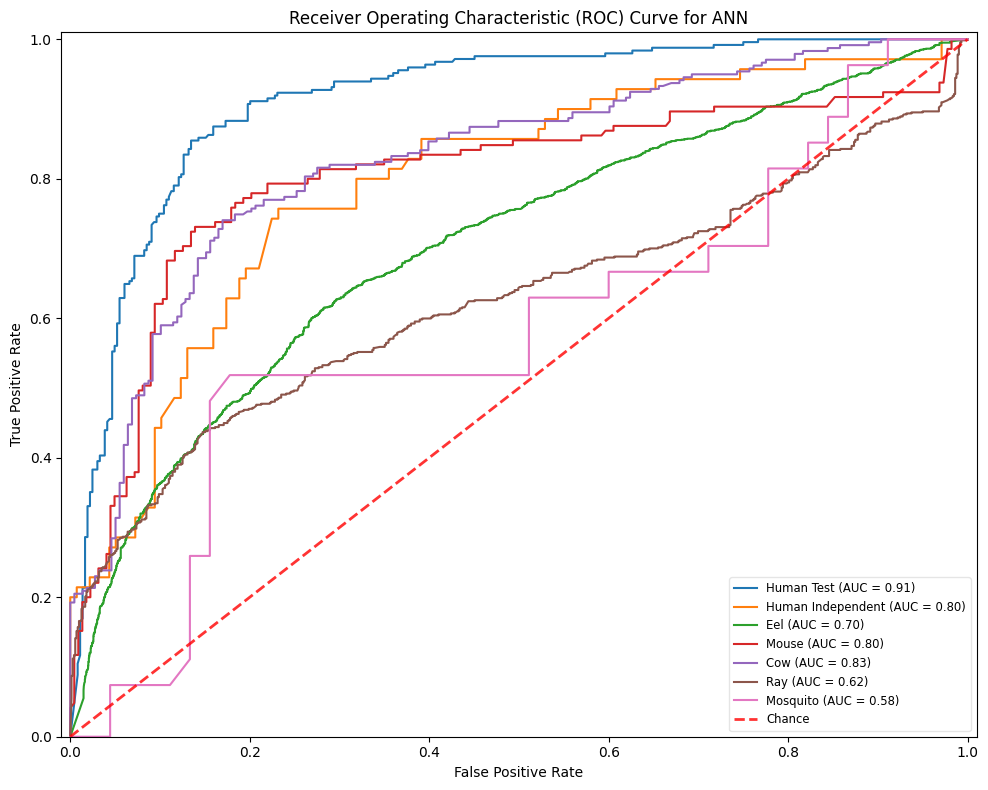

Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 2ms/step
Confusion Matrix - CNN:
[277  87]
[ 38 210]
Model: CNN
Accuracy: 0.795751633986928
Precision: 0.7070707070707071
Recall: 0.8467741935483871
F1 Score: 0.7706422018348624
ROC-AUC Score: 0.872169665012407
Cohen's Kappa Score: 0.5892132225014499
MCC Score: 0.5970042653278307

Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 47ms/step
Confusion Matrix - CNN:
[103  35]
[29 41]
Model: CNN
Accuracy: 0.6923076923076923
Precision: 0.5394736842105263
Recall: 0.5857142857142857
F1 Score: 0.5616438356164384
ROC-AUC Score: 0.6745859213250519
Cohen's Kappa Score: 0.32522303325223023
MCC Score: 0.3258757432158925

Evaluating dataset: Eel
Evaluating model: CNN
171/171 [==============================] - 1s 3ms/step
Confusion Matrix - CNN:
[2237 1138]
[ 801 1283]
Model: CNN
Accuracy: 0.6448067411613849
Precision: 0.529946303180504
Recall: 0.6156429

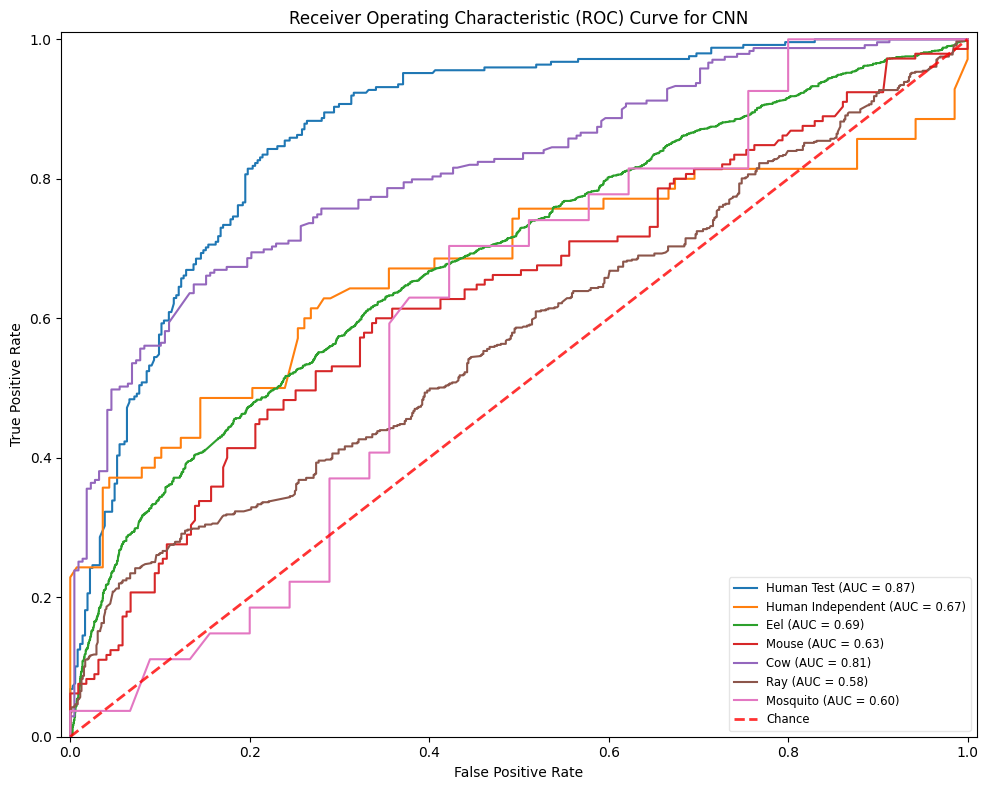

Evaluating dataset: Human Test
Evaluating model: LSTM
20/20 [==============================] - 0s 12ms/step
Confusion Matrix - LSTM:
[364   0]
[248   0]
Model: LSTM
Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5013736263736264
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Human Independent
Evaluating model: LSTM
7/7 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - LSTM:
[138   0]
[70  0]
Model: LSTM
Accuracy: 0.6634615384615384
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Eel
Evaluating model: LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171/171 [==============================] - 3s 19ms/step
Confusion Matrix - LSTM:
[3375    0]
[2084    0]
Model: LSTM
Accuracy: 0.6182450998351346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5032251368450985
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mouse
Evaluating model: LSTM
 1/12 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 22ms/step
Confusion Matrix - LSTM:
[223   0]
[145   0]
Model: LSTM
Accuracy: 0.6059782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.503448275862069
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Cow
Evaluating model: LSTM
 1/15 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 17ms/step
Confusion Matrix - LSTM:
[218   0]
[239   0]
Model: LSTM
Accuracy: 0.47702407002188185
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Ray
Evaluating model: LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - LSTM:
[719   0]
[687   0]
Model: LSTM
Accuracy: 0.5113798008534851
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mosquito
Evaluating model: LSTM
3/3 [==============================] - 0s 17ms/step
Confusion Matrix - LSTM:
[45  0]
[27  0]
Model: LSTM
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


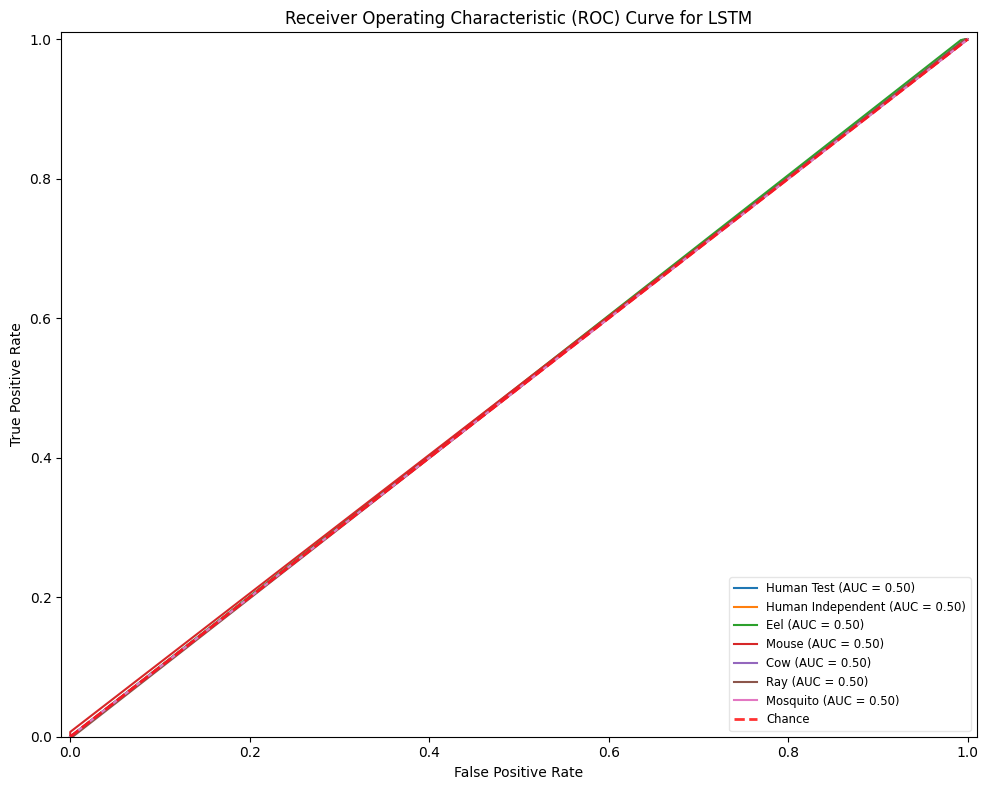

Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 0s 11ms/step
Confusion Matrix - GRU:
[364   0]
[248   0]
Model: GRU
Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.52088133640553
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Human Independent
Evaluating model: GRU
6/7 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 12ms/step
Confusion Matrix - GRU:
[138   0]
[70  0]
Model: GRU
Accuracy: 0.6634615384615384
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.513664596273292
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Eel


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model: GRU
171/171 [==============================] - 3s 16ms/step
Confusion Matrix - GRU:
[3375    0]
[2084    0]
Model: GRU
Accuracy: 0.6182450998351346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5100217530390275
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mouse
Evaluating model: GRU
 1/12 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 16ms/step
Confusion Matrix - GRU:
[223   0]
[145   0]
Model: GRU
Accuracy: 0.6059782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.3917117674346683
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Cow
Evaluating model: GRU
 1/15 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 15ms/step
Confusion Matrix - GRU:
[218   0]
[239   0]
Model: GRU
Accuracy: 0.47702407002188185
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5210356608191625
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Ray
Evaluating model: GRU
 6/44 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 11ms/step
Confusion Matrix - GRU:
[719   0]
[687   0]
Model: GRU
Accuracy: 0.5113798008534851
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.47104582824681696
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mosquito
Evaluating model: GRU
3/3 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - GRU:
[45  0]
[27  0]
Model: GRU
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.47078189300411516
Cohen's Kappa Score: 0.0
MCC Score: 0.0



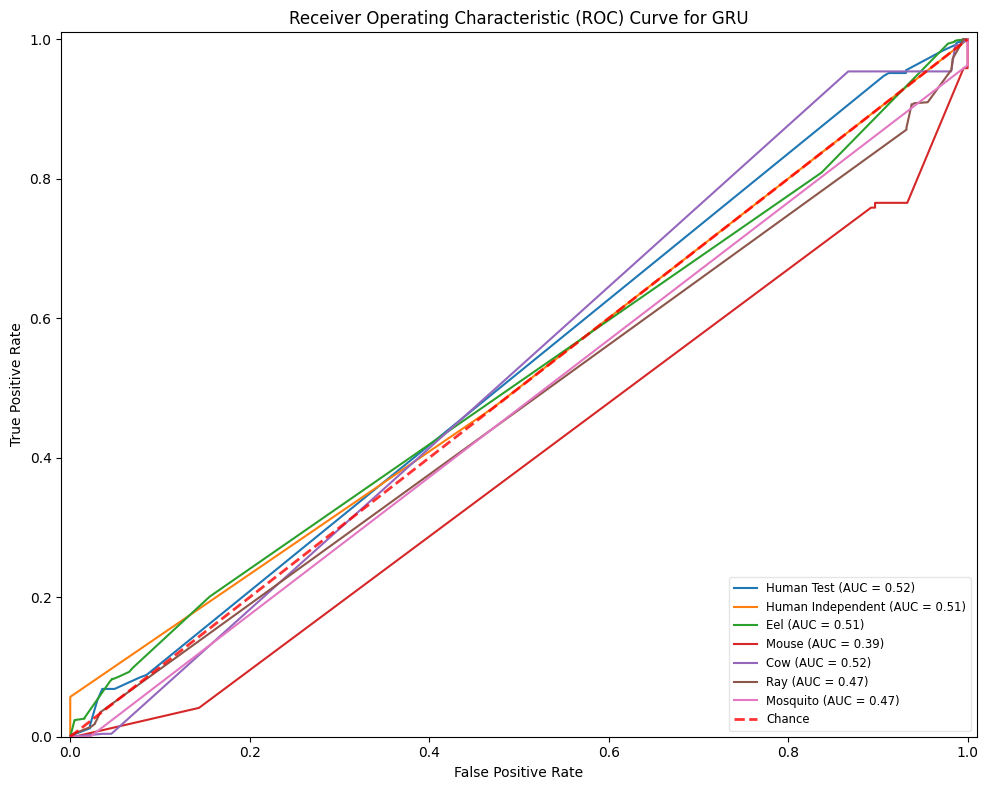

Evaluating dataset: Human Test
Evaluating model: Bi-LSTM
20/20 [==============================] - 0s 21ms/step
Confusion Matrix - Bi-LSTM:
[364   0]
[248   0]
Model: Bi-LSTM
Accuracy: 0.5947712418300654
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
1/7 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 24ms/step
Confusion Matrix - Bi-LSTM:
[138   0]
[70  0]
Model: Bi-LSTM
Accuracy: 0.6634615384615384
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Eel
Evaluating model: Bi-LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171/171 [==============================] - 4s 21ms/step
Confusion Matrix - Bi-LSTM:
[3375    0]
[2084    0]
Model: Bi-LSTM
Accuracy: 0.6182450998351346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mouse
Evaluating model: Bi-LSTM
 4/12 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 21ms/step
Confusion Matrix - Bi-LSTM:
[223   0]
[145   0]
Model: Bi-LSTM
Accuracy: 0.6059782608695652
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Cow
Evaluating model: Bi-LSTM
 4/15 [=======>......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 21ms/step
Confusion Matrix - Bi-LSTM:
[218   0]
[239   0]
Model: Bi-LSTM
Accuracy: 0.47702407002188185
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Ray
Evaluating model: Bi-LSTM
 4/44 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 22ms/step
Confusion Matrix - Bi-LSTM:
[719   0]
[687   0]
Model: Bi-LSTM
Accuracy: 0.5113798008534851
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0

Evaluating dataset: Mosquito
Evaluating model: Bi-LSTM
3/3 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - Bi-LSTM:
[45  0]
[27  0]
Model: Bi-LSTM
Accuracy: 0.625
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.5
Cohen's Kappa Score: 0.0
MCC Score: 0.0



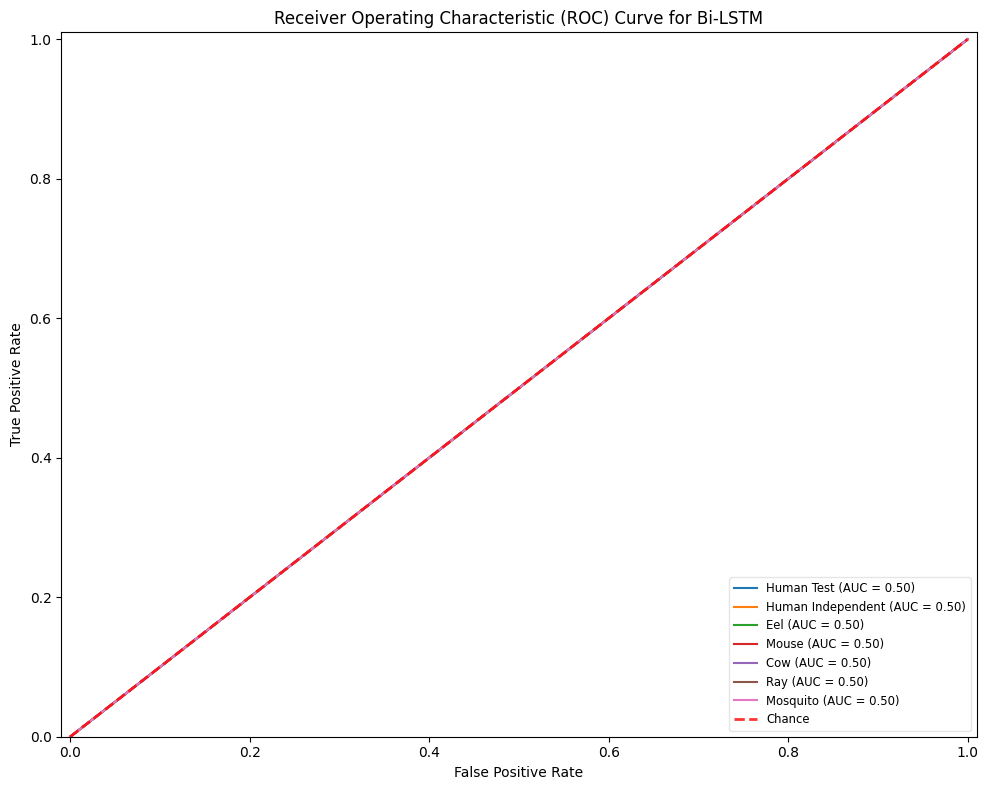

                                                                 ANN  \
Human Test         {'Accuracy': 0.8496732026143791, 'Precision': ...   
Human Independent  {'Accuracy': 0.7548076923076923, 'Precision': ...   
Eel                {'Accuracy': 0.678146180619161, 'Precision': 0...   
Mouse              {'Accuracy': 0.7907608695652174, 'Precision': ...   
Cow                {'Accuracy': 0.7768052516411379, 'Precision': ...   
Ray                {'Accuracy': 0.6258890469416786, 'Precision': ...   
Mosquito           {'Accuracy': 0.6527777777777778, 'Precision': ...   

                                                                 CNN  \
Human Test         {'Accuracy': 0.795751633986928, 'Precision': 0...   
Human Independent  {'Accuracy': 0.6923076923076923, 'Precision': ...   
Eel                {'Accuracy': 0.6448067411613849, 'Precision': ...   
Mouse              {'Accuracy': 0.5978260869565217, 'Precision': ...   
Cow                {'Accuracy': 0.737417943107221, 'Precision':

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

# Define a function to print the confusion matrix as text
def print_confusion_matrix(confusion, model_name):
    print(f"Confusion Matrix - {model_name}:")
    for row in confusion:
        print(row)

# Define a function to plot ROC AUC curve
def plot_roc_auc(y_true, y_score, model_name, dataset_name):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{dataset_name} (AUC = {roc_auc:.2f})')

# Assuming you have a dictionary of datasets
datasets = {
    'Human Test': test_df,
    'Human Independent': df_humanIndependent_tpot_final,
    'Eel': df_eel_tpot_final,
    'Mouse': df_mouse_tpot_final,
    'Cow': df_cow_tpot_final,
    'Ray': df_ray_tpot_final,
    'Mosquito': df_mosquito_tpot_final
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
all_results = {}
confusion_matrices = {}

for model_name in models.keys():
    plt.figure(figsize=(10, 8))

    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.loc[:, 'PubchemFP0':])
        y = dataset['single-class-label']

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        model = models[model_name]
        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Calculate the confusion matrix
        confusion = confusion_matrix(y, y_pred)

        # Store confusion matrix
        confusion_matrices[(dataset_name, model_name)] = confusion

        # Print the confusion matrix as text
        print_confusion_matrix(confusion, model_name)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("ROC-AUC Score:", roc_auc)
        print("Cohen's Kappa Score:", cohen_kappa)
        print("MCC Score:", mcc)
        print()

        # Plot ROC-AUC curve
        plot_roc_auc(y, y_pred_prob[:, 1], model_name, dataset_name)

        # Store results
        if model_name not in all_results:
            all_results[model_name] = {}
        all_results[model_name][dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.xlim([-0.01, 1.01])
    plt.ylim([0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
    plt.legend(loc="lower right", fontsize='small', fancybox=True, framealpha=0.5)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'roc_auc_curve_{model_name}.png')
    plt.show()
    plt.close()

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(all_results)
print(results_df)

# Save results to Excel
results_df.to_excel('deep_learning_evaluation_results.xlsx', index=True)

# Save confusion matrices to a separate Excel file
with pd.ExcelWriter('confusion_matrices.xlsx') as writer:
    for (dataset_name, model_name), confusion_matrix in confusion_matrices.items():
        df_confusion = pd.DataFrame(confusion_matrix)
        df_confusion.to_excel(writer, sheet_name=f'{dataset_name}_{model_name}_confusion_matrix', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
datasets = {
    'Human Test': test_df,
    'Human Independent': df_humanIndependent_tpot_final,
    'Eel': df_eel_tpot_final,
    'Mouse': df_mouse_tpot_final,
    'Cow': df_cow_tpot_final,
    'Ray': df_ray_tpot_final,
    'Mosquito': df_mosquito_tpot_final
}

models = {
    'ANN': ann_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'Bi-LSTM': bi_lstm_model
}

# Evaluate and store results for all datasets
for model_name, model in models.items():
    model_results = {}
    for dataset_name, dataset in datasets.items():
        print(f"Evaluating dataset: {dataset_name}")

        scaler = StandardScaler()
        X = scaler.fit_transform(dataset.loc[:, 'PubchemFP0':])
        y = dataset['single-class-label']

        print(f"Evaluating model: {model_name}")

        # Reshape input data for RNN models
        if 'LSTM' in model_name or 'GRU' in model_name:
            X_rnn = X.reshape(X.shape[0], X.shape[1], 1)
        else:
            X_rnn = X

        y_pred_prob = model.predict(X_rnn)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        roc_auc = roc_auc_score(y, y_pred_prob[:, 1])
        cohen_kappa = cohen_kappa_score(y, y_pred)
        mcc = matthews_corrcoef(y, y_pred)

        # Store results
        model_results[dataset_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc,
            'Cohen\'s Kappa': cohen_kappa,
            'MCC': mcc
        }

    # Create a Pandas DataFrame from the results
    results_df = pd.DataFrame(model_results)

    # Save results to Excel
    results_df.to_excel(f'{model_name}_evaluation_results.xlsx', index=True)


Evaluating dataset: Human Test
Evaluating model: ANN
20/20 [==============================] - 0s 2ms/step
Evaluating dataset: Human Independent
Evaluating model: ANN
7/7 [==============================] - 0s 3ms/step
Evaluating dataset: Eel
Evaluating model: ANN
171/171 [==============================] - 0s 3ms/step
Evaluating dataset: Mouse
Evaluating model: ANN
12/12 [==============================] - 0s 3ms/step
Evaluating dataset: Cow
Evaluating model: ANN
15/15 [==============================] - 0s 3ms/step
Evaluating dataset: Ray
Evaluating model: ANN
44/44 [==============================] - 0s 3ms/step
Evaluating dataset: Mosquito
Evaluating model: ANN
3/3 [==============================] - 0s 4ms/step
Evaluating dataset: Human Test
Evaluating model: CNN
20/20 [==============================] - 0s 6ms/step
Evaluating dataset: Human Independent
Evaluating model: CNN
7/7 [==============================] - 0s 3ms/step
Evaluating dataset: Eel
Evaluating model: CNN
171/171 [=========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating dataset: Eel
Evaluating model: LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171/171 [==============================] - 2s 11ms/step
Evaluating dataset: Mouse
Evaluating model: LSTM
 5/12 [===========>..................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 15ms/step
Evaluating dataset: Cow
Evaluating model: LSTM
 5/15 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 15ms/step
Evaluating dataset: Ray
Evaluating model: LSTM
 1/44 [..............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 14ms/step
Evaluating dataset: Mosquito
Evaluating model: LSTM
3/3 [==============================] - 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating dataset: Human Test
Evaluating model: GRU
20/20 [==============================] - 0s 16ms/step
Evaluating dataset: Human Independent
Evaluating model: GRU
1/7 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 16ms/step
Evaluating dataset: Eel
Evaluating model: GRU


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171/171 [==============================] - 2s 11ms/step
Evaluating dataset: Mouse
Evaluating model: GRU
10/12 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 12ms/step
Evaluating dataset: Cow
Evaluating model: GRU
 6/15 [===========>..................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 11ms/step
Evaluating dataset: Ray
Evaluating model: GRU
 6/44 [===>..........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 11ms/step
Evaluating dataset: Mosquito
Evaluating model: GRU
3/3 [==============================] - 0s 12ms/step
Evaluating dataset: Human Test
Evaluating model: Bi-LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


20/20 [==============================] - 0s 21ms/step
Evaluating dataset: Human Independent
Evaluating model: Bi-LSTM
4/7 [================>.............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 0s 22ms/step
Evaluating dataset: Eel
Evaluating model: Bi-LSTM


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


171/171 [==============================] - 4s 21ms/step
Evaluating dataset: Mouse
Evaluating model: Bi-LSTM
 4/12 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12/12 [==============================] - 0s 29ms/step
Evaluating dataset: Cow
Evaluating model: Bi-LSTM
 1/15 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


15/15 [==============================] - 0s 27ms/step
Evaluating dataset: Ray
Evaluating model: Bi-LSTM
 1/44 [..............................] - ETA: 1s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


44/44 [==============================] - 1s 27ms/step
Evaluating dataset: Mosquito
Evaluating model: Bi-LSTM
1/3 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3/3 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for model_name, model in models.items():
  model.save(f'{model_name}_model.h5')

## References
*  PubChem Substructure Fingerprint. (2009). PubChem; V1.3. ftp://ftp.ncbi.nlm.nih.gov/pubchem/specifications/pubchem_fingerprints.pdf
*  https://colab.research.google.com/drive/1Kunjr8hF3MQPPN_AGedBP07AOE5Bcu1M?usp=sharing#scrollTo=1msUAjuKiIGP
*   Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283